# ATTRITION CASE STUDY (Fictional Dataset Created by IBM Data Scientist)


Employees are the backbone of any organization. Its performance is heavily based on the quality of the employees and retaining them. With employee attrition, organizations are faced with a number of challenges:

Expensive in terms of both money and time to train new employees
Loss of experienced employees
Impact on productivity
Impact on profit
Loss of goodwill of the company in employee market
IT industry logged 25% attrition in FY22, trend to continue: Report

Thus in a situation when more and more employees are quitting the organization, the attrition rate is on a rise. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provide necessary support to retain those employees or do preventive hiring to minimize the impact to the organization.

The dataset used is downloaded from Kaggle and contains HR analytics data of employees in IBM that stay and leave. The types of data include metrics such as education level, job satisfactions, commmute distance and 31 more vairables

Objective
The objective to study factors like salary, satisfactory level, growth opportunities, facilities recognition, appreciation, employees service time which may contribute to attrition . This study also aims to find the factors affecting attrition and relating to retain employees. The hypothesis of the study is attrition increases the cost of recurting and also therby impacting the overall profitabilty of the company

Model Building Involves
There are 34 predictors to predict attrition

model building mainly involves

1) Data cleaning and preparation

2) Preprocessing Feature encoding (Transforming categorical features to binary)

4) Feature selection 

5) Train test split

6) Model Building using RFE, P values and VIFS

7) Model training using Decision Tree, SVM, Logistic Regression

8) Decising threshold with help of ROC AUC Curve

9) Model Evaluation using dufferent metrics

10) Prediction on the test data

11) Model deployment with Flask API 


In [1]:
#import data manipulation libraries
import numpy as np
import pandas as pd
#import standard visualization
import matplotlib.pyplot as plt
import pygal
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#model developemnt libraries
from sklearn import preprocessing

import pygal
from IPython.display import SVG, display
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataorginal = pd.read_csv('data/IBM_A.csv')
df=pd.read_csv('data/IBM_A.csv')


In [7]:
df.head() # displaying first five records

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# checking for null values

In [8]:


dataorginal.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# There are no missing values in data

# Descrptive statistics

In [9]:

dataorginal.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Insights

  From above description of numerical data --

   Mean age is 36 which is also the median age suggesting normal distribution of age, with minimum age is 18 and maximum age is 60

   Mean daily rate is Rs 802, with min 102 and maximum of Rs 1500

   The mean distance from home is 9 with employees staying within 1 km and maximum of 29km farer

   Mean hourly rate is Rs 66, with min 30 and maximum of Rs 100
   
   Mean Monthly Income is 3000, with 20000 being the maximum
   

# Checking Null and dtypes

In [10]:
dataorginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking dupicates values in dataset

In [16]:
dataorginal.duplicated().sum() 

0

 They are no duplcates in the dataset

Checking unique values in each features

In [11]:
dataorginal.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Categotical Features

 Data Visualization and Data Preparation


Encoding is a required pre-processing step when working with categorical data.

Encoding is done so that machine learnng model will be able to intrepet the data. As machine cannot understand categorical features it is important to convert category of features into numerical one, so that machine can learn from the data and gives the right model

# Nominal Encoding

When we have a feature where variables are just names and there is no order or rank to this variable's feature. As most of features are not having an order or rank, nominal encoding is followed in this study

# Visualizing categorical features and performing Encoding

# Defining a function to plot histogram


In [12]:
def plothidt(x):
    plt.hist(x)
    
    print(f" Employees distribution \n \n {x.value_counts(normalize=True)*100}")

# Education Feild

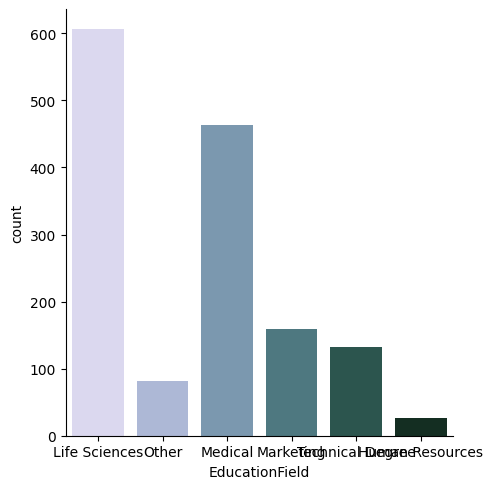

In [21]:
sns.catplot(data=df, x="EducationField", kind="count", palette="ch:50")

# Insights
Most employees are working in life cycle and Medical education


# Nominal encoding 
# Encoding the feature education field to numerical feature 

In [13]:
df['EducationField'].replace('Life Sciences',1,inplace=True)
df['EducationField'].replace('Medical',2,inplace=True)
df['EducationField'].replace('Marketing',3,inplace=True)
df['EducationField'].replace('Other',4,inplace=True)
df['EducationField'].replace('Technical Degree',5,inplace=True)
df['EducationField'].replace('Human Resources', 6,inplace=True)


# Department

 Employees distribution 
 
 Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64


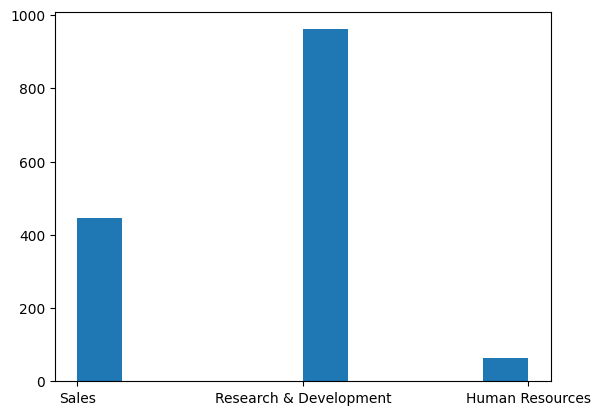

In [14]:

# Visualizing
plothidt(df['Department'])

# Insights
 Most employees work in Research and development team followed by sales

In [15]:
# Encoding the feature Department to numerical feature

df['Department'].replace('Research & Development',1,inplace=True)
df['Department'].replace('Sales',2,inplace=True)
df['Department'].replace('Human Resources',3,inplace=True)

# Business Travel

 Employees distribution 
 
 Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64


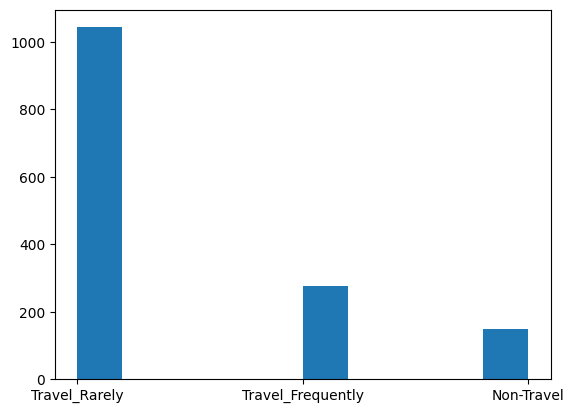

In [16]:

# Visualizing
plothidt(df['BusinessTravel'])

# Insights
 
 Most employees travely rarely for business purpose.

In [17]:
# Encoding the feature Business Travel to numerical feature
df['BusinessTravel'].replace('Travel_Rarely',1,inplace=True)
df['BusinessTravel'].replace('Travel_Frequently',2,inplace=True)
df['BusinessTravel'].replace('Non-Travel',3,inplace=True)

# Martial Status

 Employees distribution 
 
 Married     45.782313
Single      31.972789
Divorced    22.244898
Name: MaritalStatus, dtype: float64


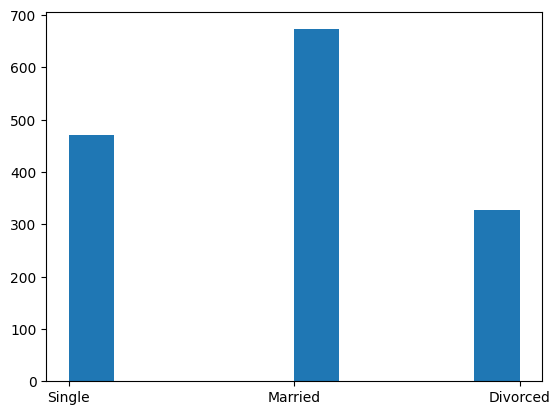

In [18]:
# Visualizing MaritalStatus
plothidt(df['MaritalStatus'])

# Insights

 Most employees are married followed by singles

In [19]:
# Encoding the feature Marital Status to numerical feature
df['MaritalStatus'].replace('Married',1,inplace=True)
df['MaritalStatus'].replace('Single',2,inplace=True)
df['MaritalStatus'].replace('Divorced',3,inplace=True)

# Gender

 Employees distribution 
 
 Male      60.0
Female    40.0
Name: Gender, dtype: float64


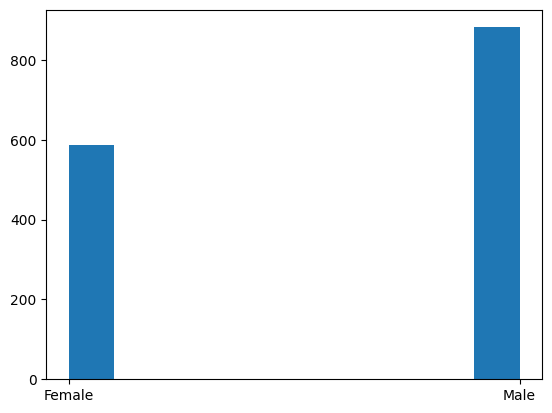

In [20]:
# Visualizing
plothidt(df['Gender'])

# Insights
60% employees are male compared to 40 % females

In [21]:
# Encoding the feature Marital Status to numerical feature
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',2,inplace=True)

# Job Role

In [22]:
# Encoding Jobrole
df['JobRole'].replace('Sales Executive',1,inplace=True)
df['JobRole'].replace('Research Scientist',2,inplace=True)
df['JobRole'].replace('Laboratory Technician',3,inplace=True)
df['JobRole'].replace('Manufacturing Director',4,inplace=True)
df['JobRole'].replace('Healthcare Representative',5,inplace=True)
df['JobRole'].replace('Manager', 6,inplace=True)
df['JobRole'].replace('Sales Representative',7,inplace=True)
df['JobRole'].replace('Research Director', 8,inplace=True)
df['JobRole'].replace('Human Resources', 9,inplace=True)

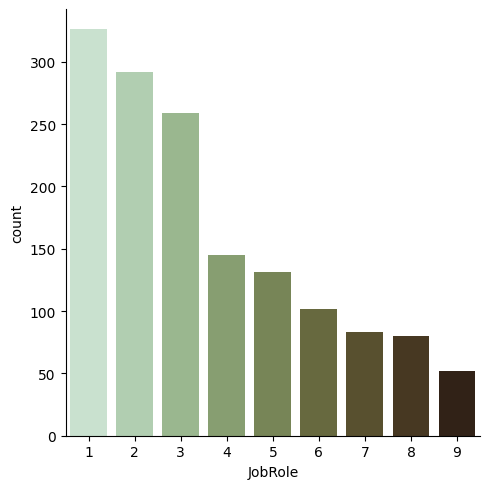

In [23]:
# Visualizing
sns.catplot(data=df, x="JobRole", kind="count", palette="ch:25")

# Insights

 Most employees are working as sales executive, followed by research scientist and labortary techinicain

# Feature encoding Ordinal Variables
   When we have a feature where variables have some order/rank.

    Coverting binary variables (Yes/No) to 0/1

# Attrition

 Employees distribution 
 
 No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


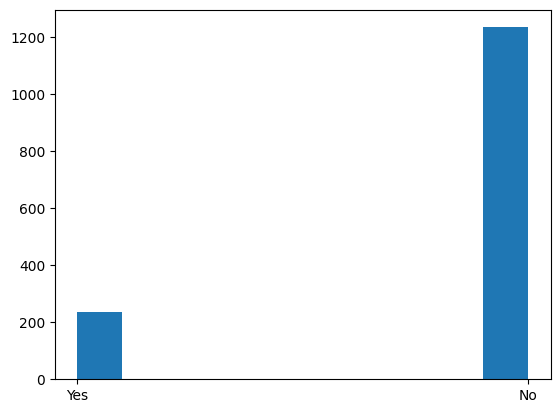

In [24]:
# Visualizing
plothidt(df['Attrition'])

# Insights

 Attrition is the target variable and it can be observed that dataset is highly imbalanced with almost 84% employees are not in to attrition and 14 % in to attrition


In [25]:
df['Attrition'].replace('Yes',1,inplace=True)
df['Attrition'].replace('No',0,inplace=True)

# Overtime

 Employees distribution 
 
 No     71.70068
Yes    28.29932
Name: OverTime, dtype: float64


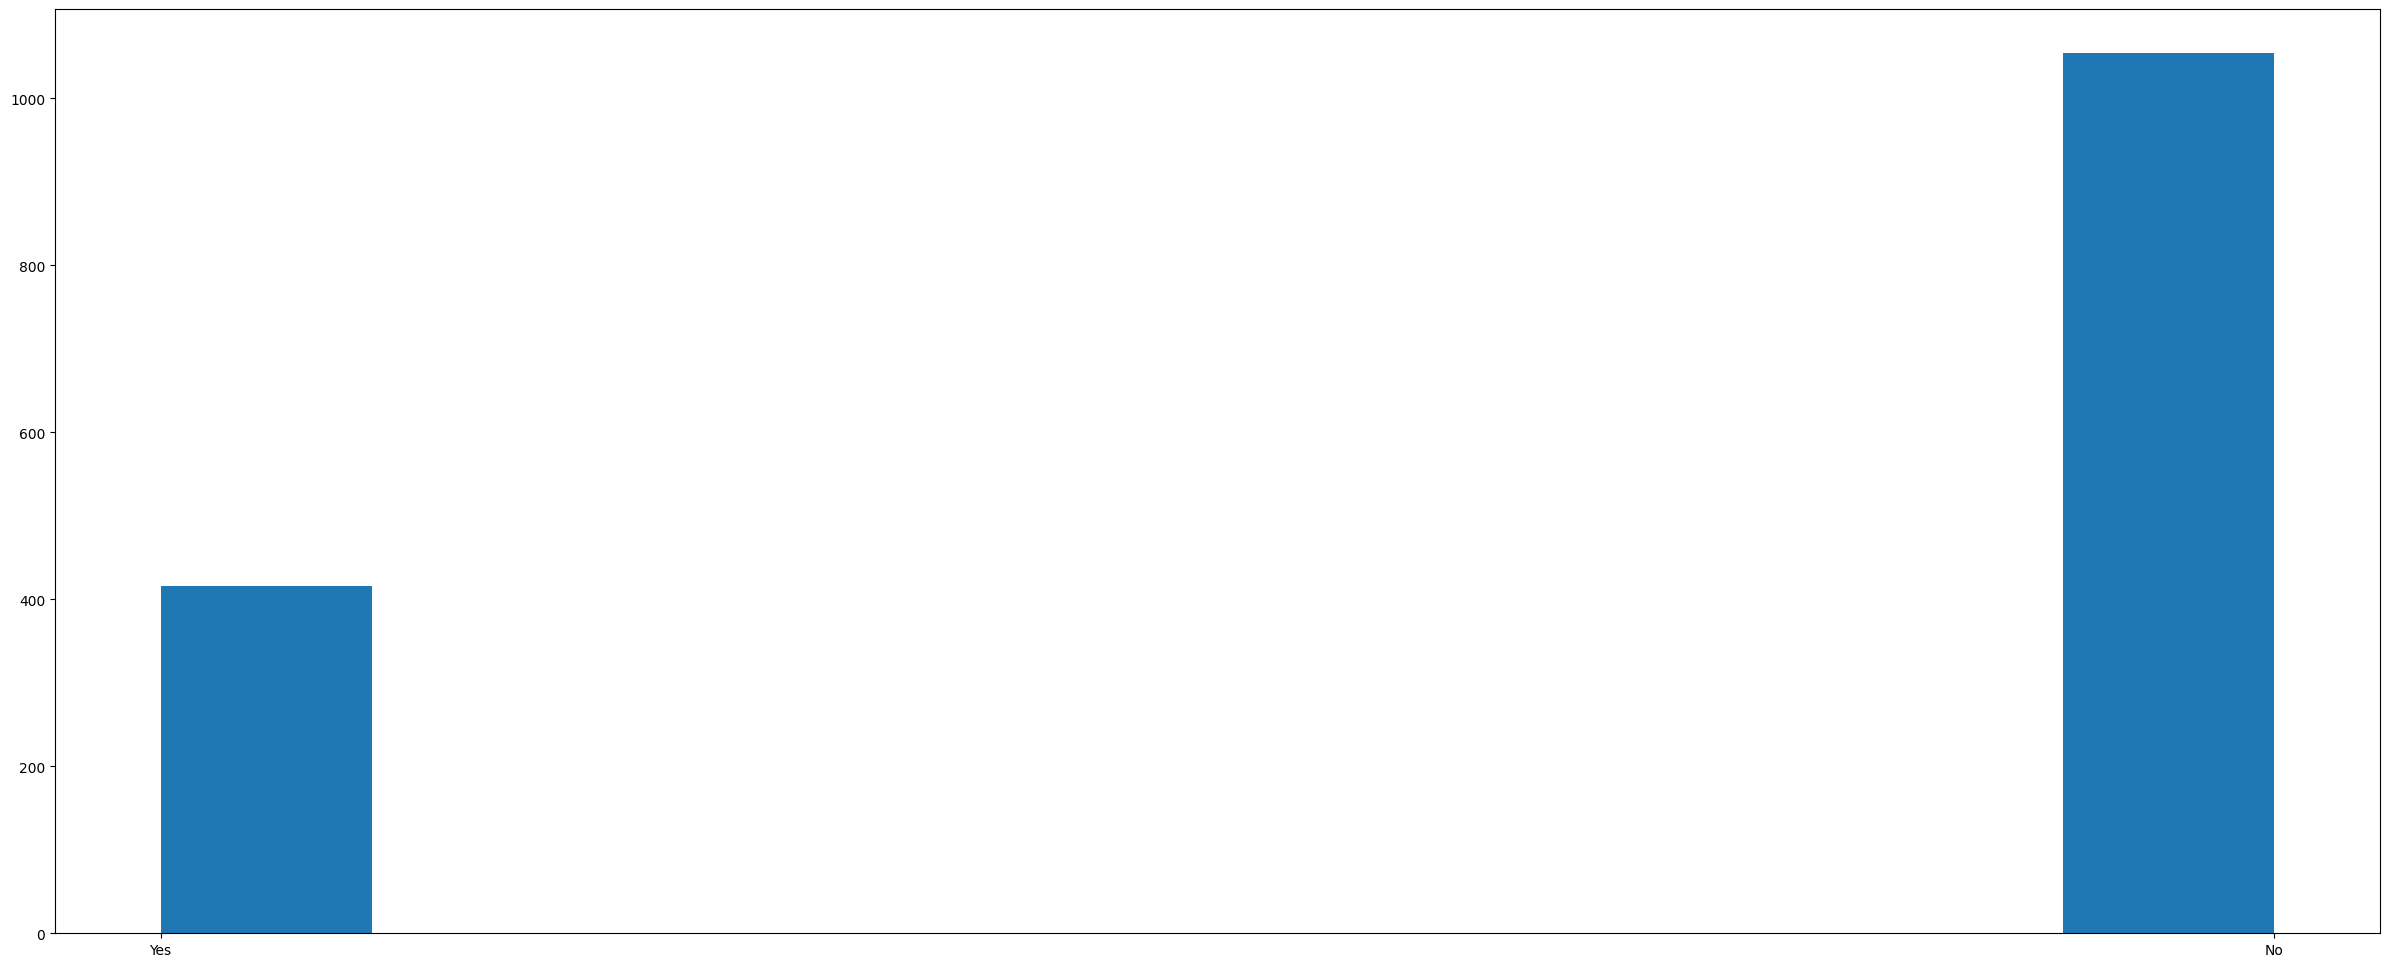

In [38]:
# Visualizing
plothidt(df['OverTime'])

# Insights

Only lesser  Employees work overtime

In [26]:
df['OverTime'].replace('Yes',1,inplace=True)
df['OverTime'].replace('No',0,inplace=True)

# Visualizing contionous variables

# Checking distribution and Outliers

# Age

<Axes: ylabel='Age'>

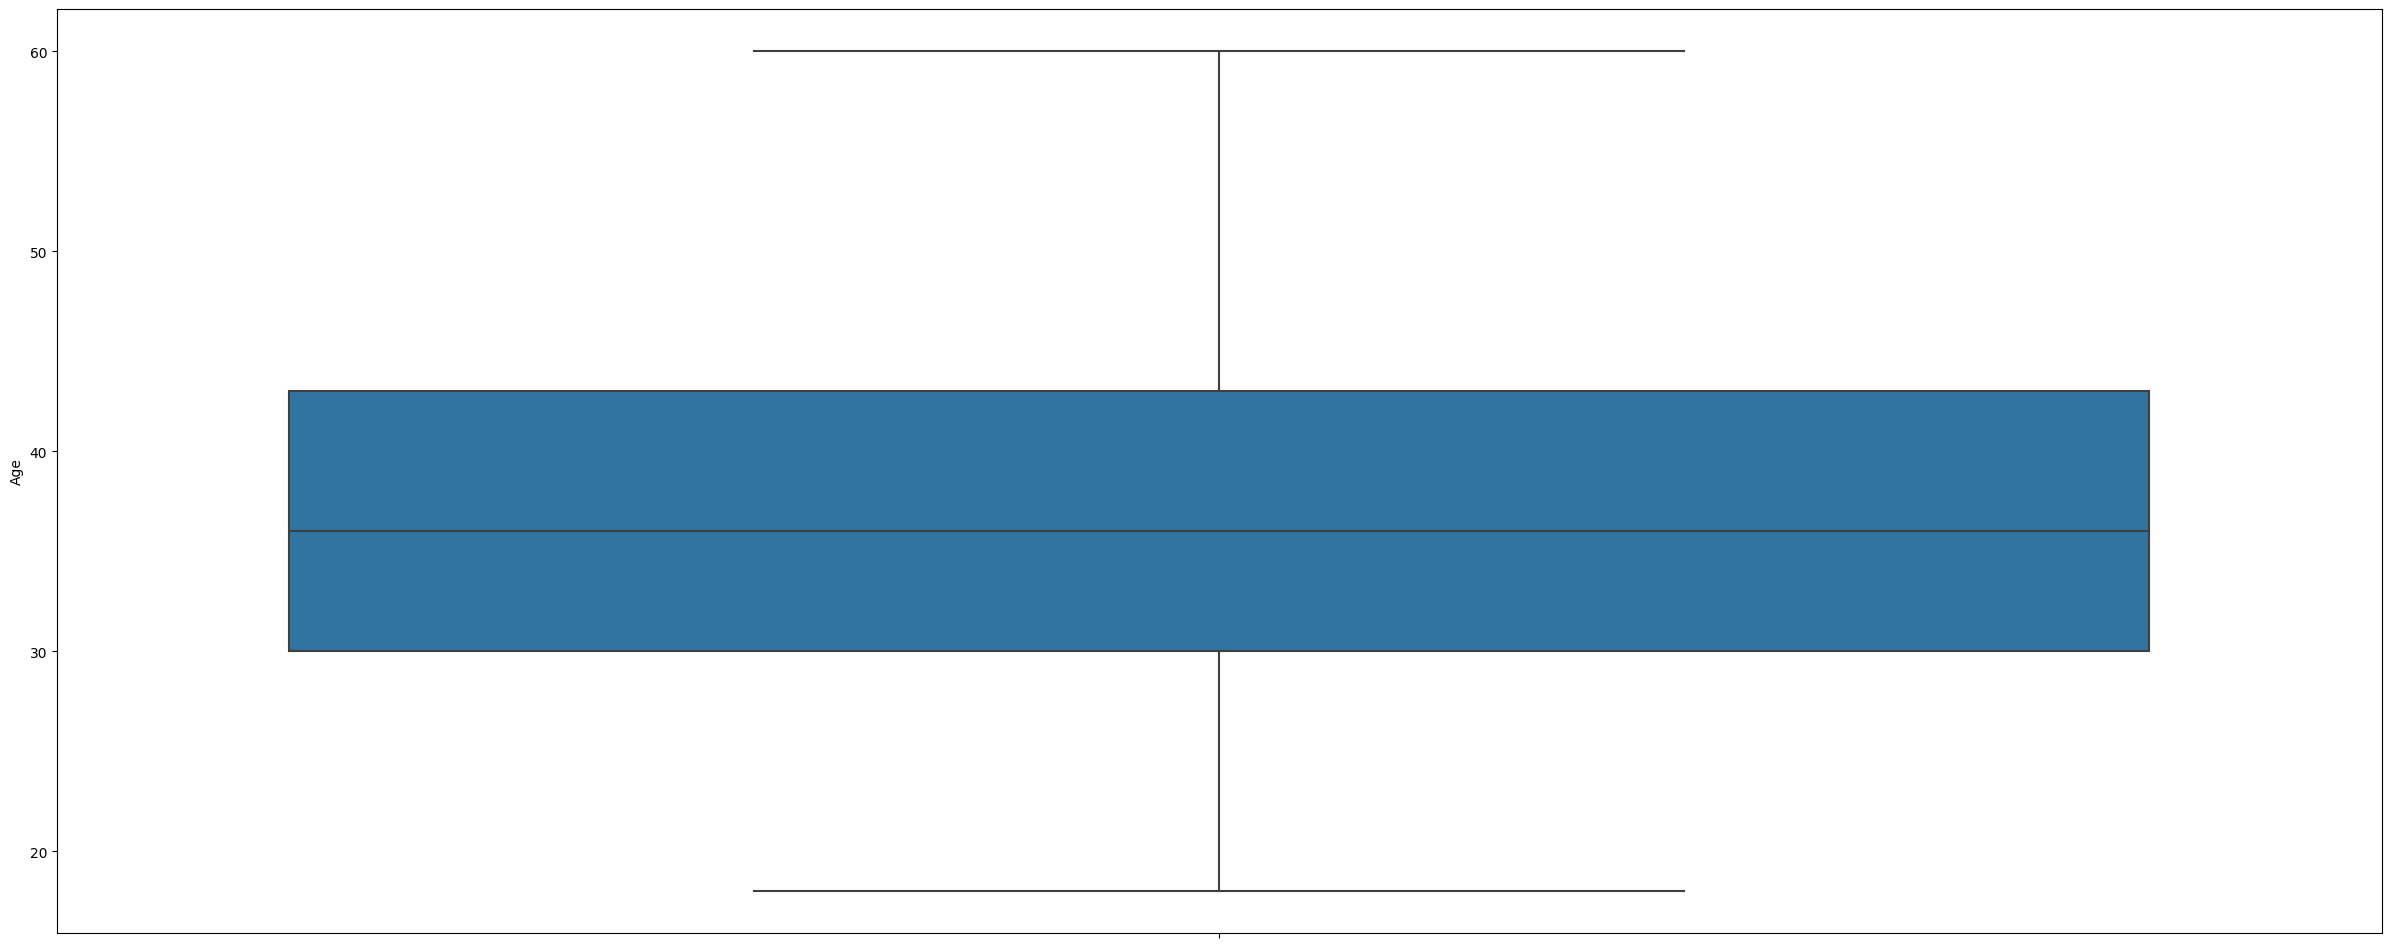

In [40]:
# Distribution of age
sns.boxplot(y='Age', data=df)


# Insights
 Median age 35
 
 A significant point of employees are clustered around 30 and 40, with more employees in bracket 30-35 age group (Lower quartile)

<Axes: ylabel='DailyRate'>

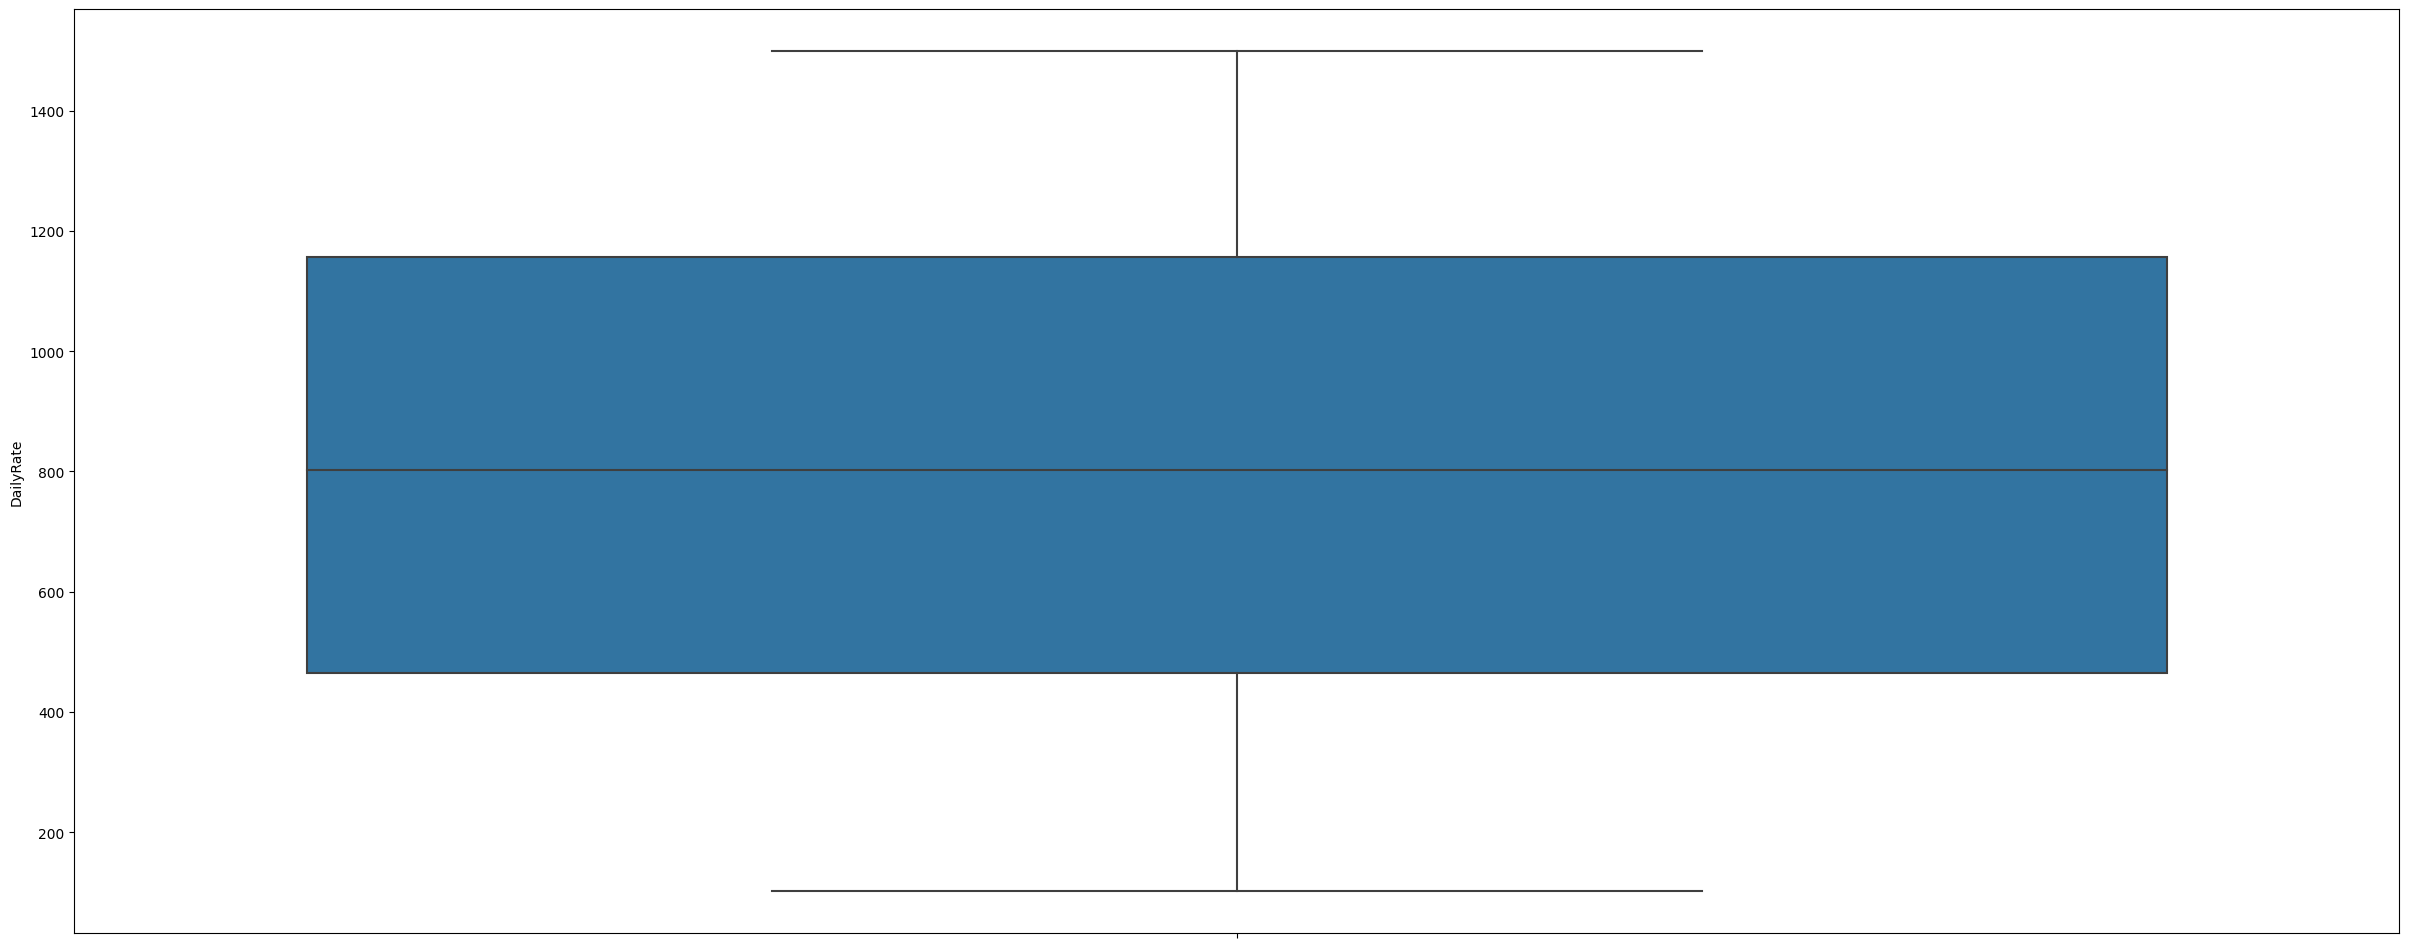

In [41]:
# Distribution of age
sns.boxplot(y='DailyRate', data=df)

# Insights
Daily wage in range of 500 and 1100 which is the standard rates in india


The median wage is 800 


# Hourly Rate

<Axes: ylabel='HourlyRate'>

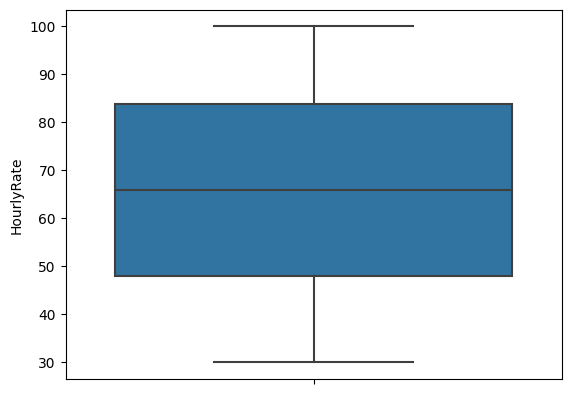

In [27]:
sns.boxplot(y="HourlyRate",data=df)

# Insights
Median Hourlyrate is 65 and most of employees hourly rate is between 50-85


# PercentSalaryHike

<Axes: ylabel='PercentSalaryHike'>

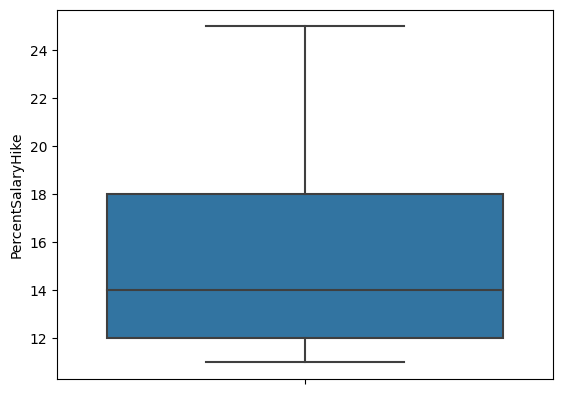

In [28]:
sns.boxplot(y="PercentSalaryHike",data=df)

# Insights

 Median PercentSalaryHike is 14%

 With most employees hike in between 12 and 14%

# Total Working Years

<Axes: ylabel='TotalWorkingYears'>

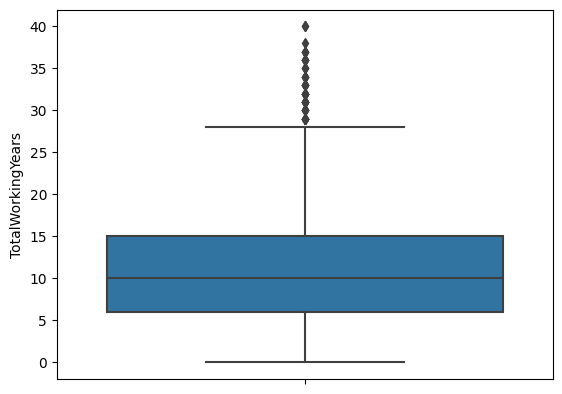

In [29]:
sns.boxplot(y='TotalWorkingYears',data=df)

# Insights

Feature TotalworkingYears is having outlier, Outlier is to be treated with imputation

TotalWorkingYears 5-15 

With the most employees having experience  5-10  years

some employees are having experience of 30+ years, highest being 40 years


In [30]:
#Before removing checkong the number of observations with yes greater than 30
df1=df[(df["Attrition"]==1)&(df["TotalWorkingYears"]>30)]
print("The Attrition 'YES' for Total working years > 30")
df1.groupby("Attrition")["TotalWorkingYears","JobRole","Department"].value_counts()

The Attrition 'YES' for Total working years > 30


Attrition  TotalWorkingYears  JobRole  Department
1          31                 4        1             1
           33                 6        2             1
           34                 4        1             1
           40                 5        1             1
                              8        1             1
dtype: int64

# Insights
There are total of 5 employees with more than 30 years of experience and all of them are in R&D Department,

 2 senior most employees having an experience of 40 years were working as health care representative and research director both employed at  R&D department

# Defining a function to impute values

In [31]:

Q1=df.TotalWorkingYears.quantile(0.25)
Q3=df.TotalWorkingYears.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(28.5, -7.5)

In [32]:
def limit_imputer(value):
   
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [33]:
df['TotalWorkingYears']=df['TotalWorkingYears'].apply(limit_imputer) # callind the function

After imputation...

<Axes: ylabel='TotalWorkingYears'>

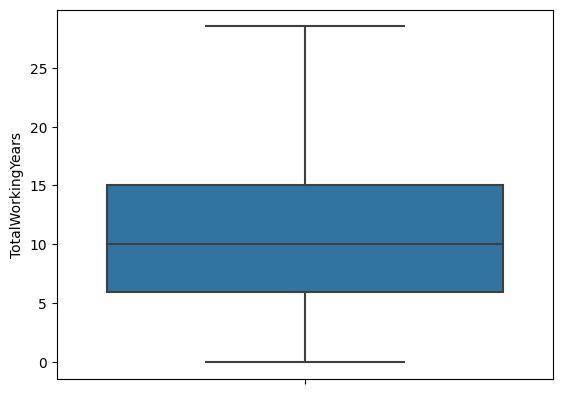

In [34]:

sns.boxplot(y='TotalWorkingYears',data=df)

# Years At Company

<Axes: ylabel='YearsAtCompany'>

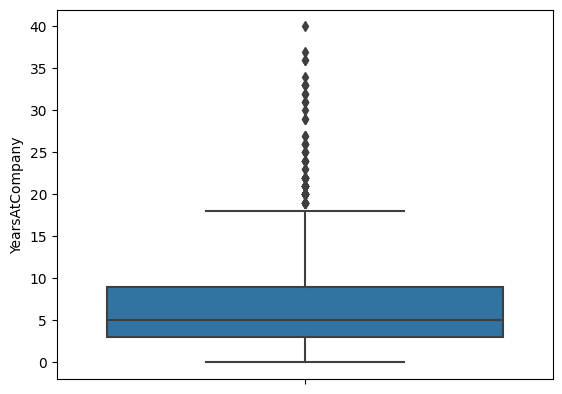

In [35]:
sns.boxplot(y="YearsAtCompany",data=df)

# Insights

Most employees work for almost 3 to 5 years in the company


In [36]:
Q1=df.YearsAtCompany.quantile(0.25)
Q3=df.YearsAtCompany.quantile(0.75)
Q1,Q3

IQR=Q3-Q1
IQR
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit
df['YearsAtCompany']=df['YearsAtCompany'].apply(limit_imputer)

<Axes: ylabel='YearsAtCompany'>

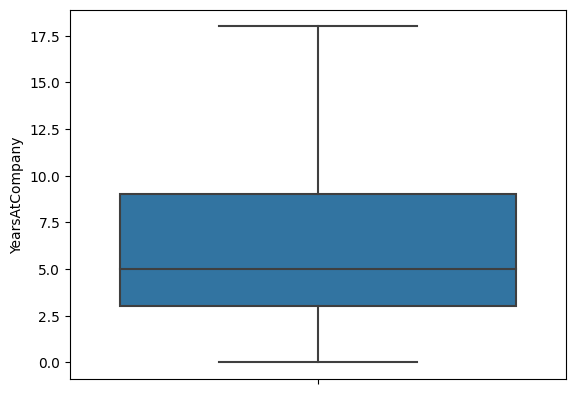

In [37]:
sns.boxplot(y="YearsAtCompany",data=df)

In [38]:
#Before removing checkong the number of observations with yes greater than 30
df1=dataorginal[(df["Attrition"]==1)&(dataorginal["YearsAtCompany"]>30)]
print("The Attrition 'YES' for Total working years > 30")
df1.groupby("Attrition")["YearsAtCompany","JobRole","Department"].value_counts()

The Attrition 'YES' for Total working years > 30


Attrition  YearsAtCompany  JobRole                    Department            
Yes        31              Research Director          Research & Development    1
           32              Manager                    Sales                     1
           33              Manufacturing Director     Research & Development    1
           40              Healthcare Representative  Research & Development    1
dtype: int64

# Exploring Ordinal Variables

# Education

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'

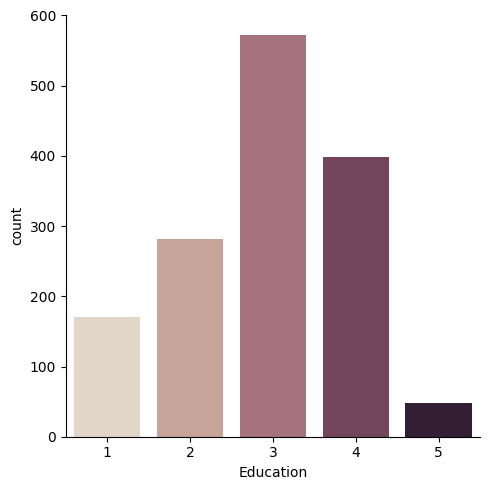

In [39]:
sns.catplot(data=df, x="Education", kind="count", palette="ch:.25")

# Insights
most employees are having Bachelors and Masters level of education

# EnvironmentSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

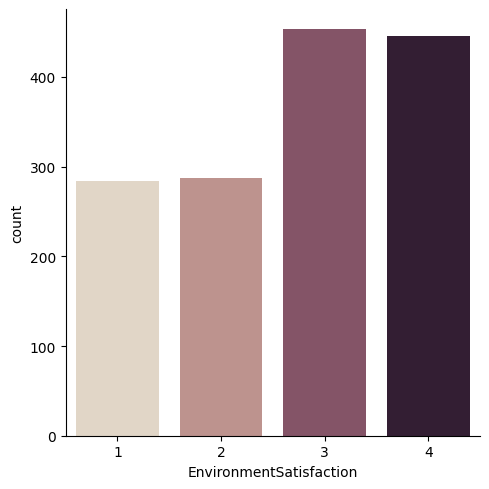

In [40]:
sns.catplot(data=df, x="EnvironmentSatisfaction", kind="count", palette="ch:.25")

# JobInvolvement 
1 'Low'

2 'Medium'

3 'High'

4 'Very High'

 Employees distribution 
 
 3    59.047619
2    25.510204
4     9.795918
1     5.646259
Name: JobInvolvement, dtype: float64


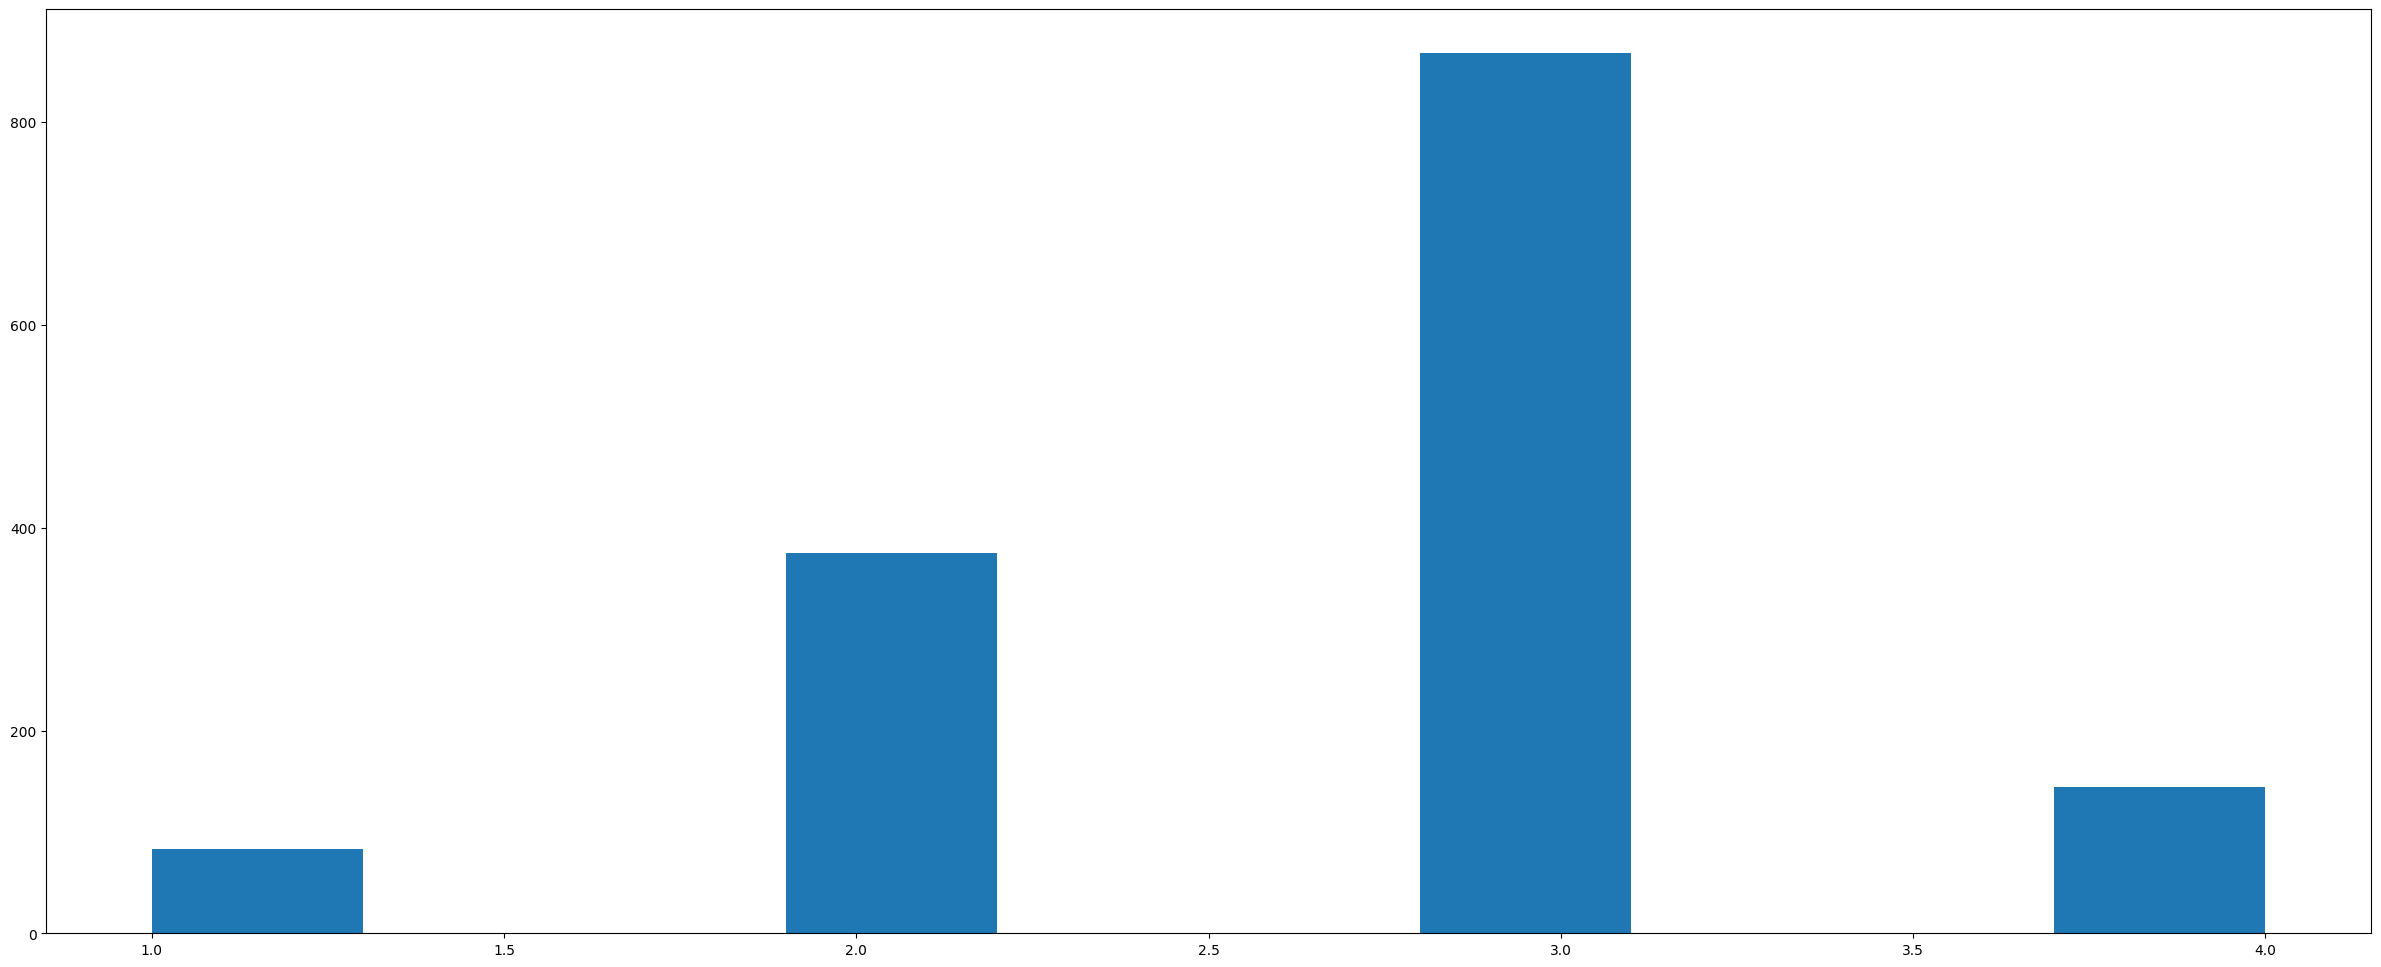

In [61]:
plothidt(df["JobInvolvement"])

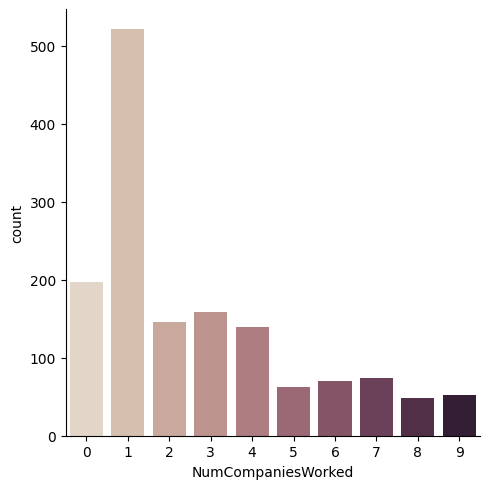

In [41]:
sns.catplot(data=df, x="NumCompaniesWorked", kind="count", palette="ch:.25")

# Insights
Here the most employees first job is with this company or they have worked previously for 1 company so we have to explore more on employees who worked only on a single company and how it is related to attrition



 But before drawing any conclusion we have to cross check with ither features for eg : Age, experience, no of years in company

# RelationshipSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

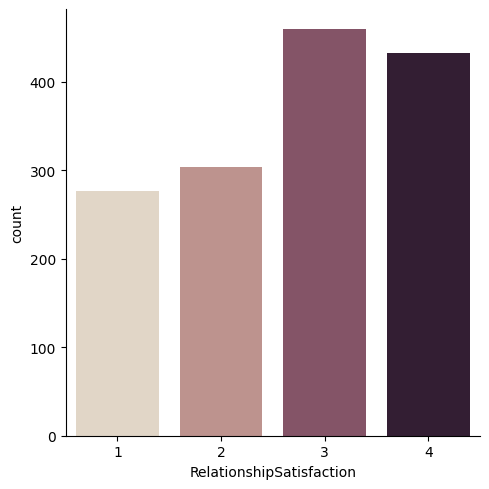

In [63]:
sns.catplot(data=df, x="RelationshipSatisfaction", kind="count", palette="ch:.25")

# WorkLifeBalance


1 'Bad'

2 'Good'

3 'Better'

4 'Best'

​

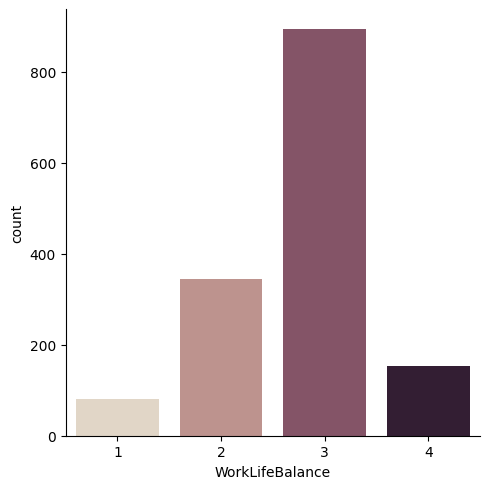

In [64]:

sns.catplot(data=df, x="WorkLifeBalance", kind="count", palette="ch:.25")

# Insights

Most of employees are having positive worklife balance rating between 2 and 3, company should focus on improving the ratings to 4, as in this case a few has rated 4 


# PerformanceRating

1 'Low'

2 'Good'

3 'Excellent'

4 'Outstanding'

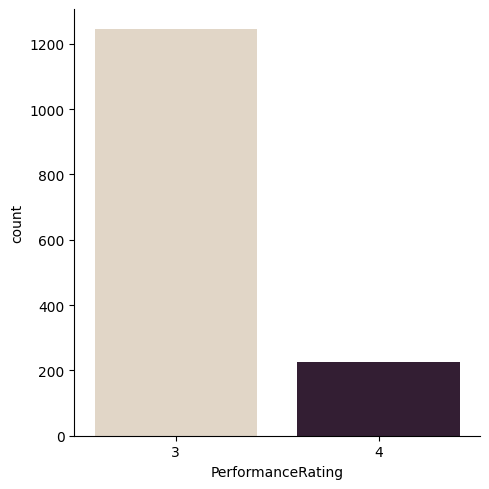

In [66]:


sns.catplot(data=df, x="PerformanceRating", kind="count", palette="ch:.25")

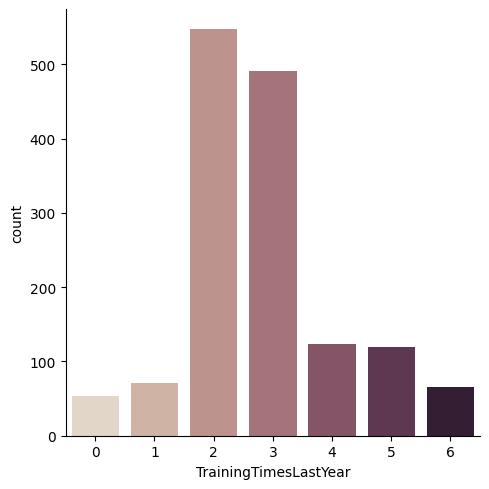

In [67]:

sns.catplot(data=df, x="TrainingTimesLastYear", kind="count", palette="ch:.25")

# Insights

Most of the employess has undergone training in the last 3-4 times, Further analysis should be made to understand the impact on Times training session attended



<Axes: xlabel='MonthlyIncome', ylabel='Density'>

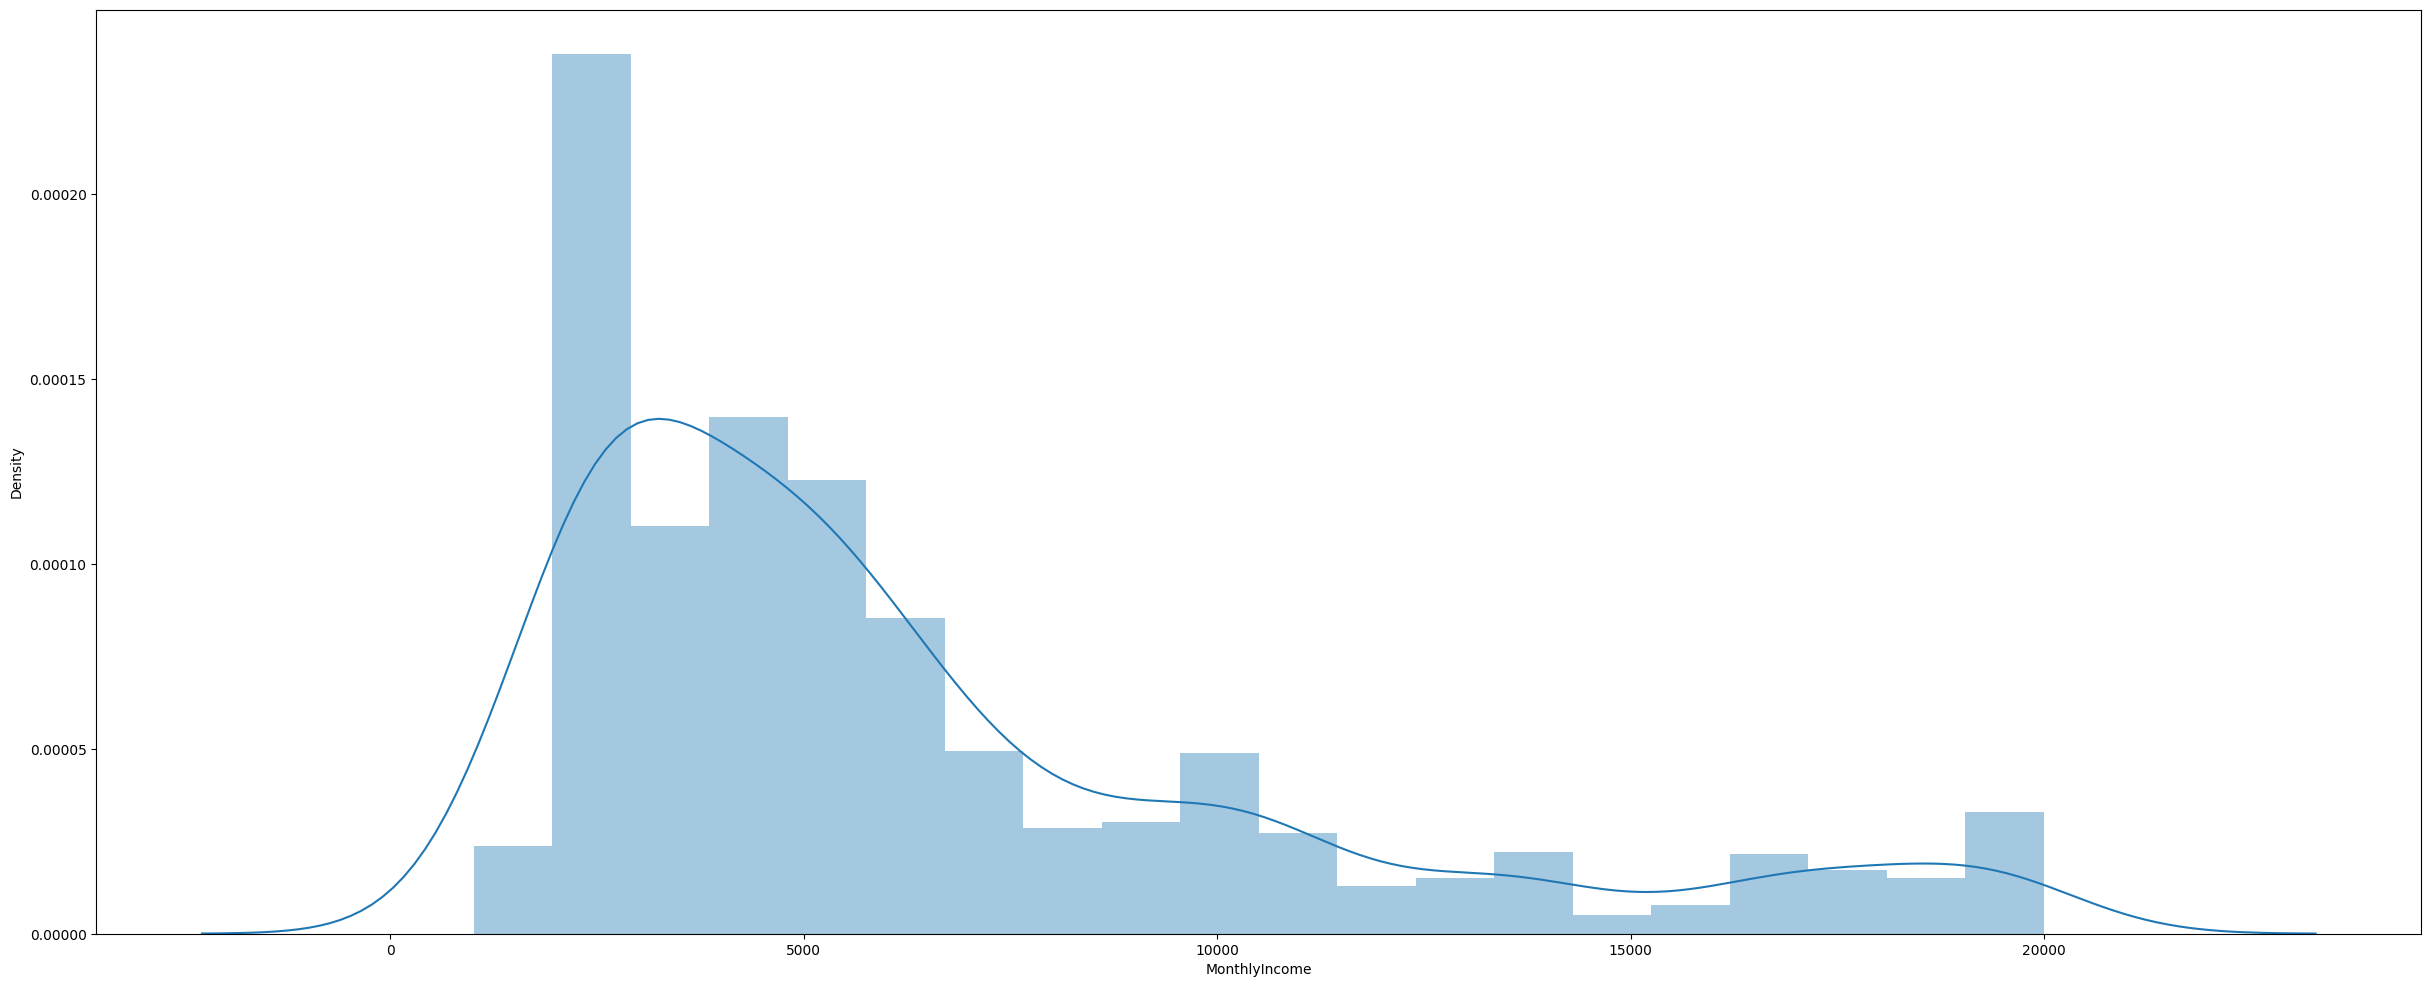

In [69]:
sns.distplot(df['MonthlyIncome'])

# Findings Univeriate Analysis

The univariate analysis of features cocludes, 

The summary is as follows ----

Education Field -- Almost 70 % of employees are from medicine and life science field

Department -- Research & Development and sales are the top Department with almost 90 % employees working

Business Travel -- Most of employees travel rarely (70 %)

Married -- Almost 45 % employees are married followed by 31 % single and divorced 22%

Gender -- The male to female ratio is 6:4

Job Roles -- Sales Executive, Research Scientist and Labortary technicians are the top 3 job roles with 50% employees working

Age -- The mean Age is 35 with most of employees in age group of 30-40

Wage -- Most employees perday wage is between 500 to 1200, which is also standard wage rate applicable in india

Monthly Income -- Most employees monthly earnings is in between 2000 to 5000, with 20000 being the maximum

Years at company -- Most employees work for almost 2.5 to 5 years

Percentage salary Hike -- Most employees are having a salary hike of 12 to 14 percent

 However as the business objective is to predict attrition we have to further analysis variables relationship among each other and thier relationship to attrition before deciding on selecting best feature to train the model.

# Biverate Analysis

# Age and Attrition

In [4]:
# Filtering attrition(Positive and negative)
positive_attrition = df[df['Attrition'] == 1]
negative_attrition = df[df['Attrition'] == 0]

Text(0.5, 1.0, 'Postive Attrition')

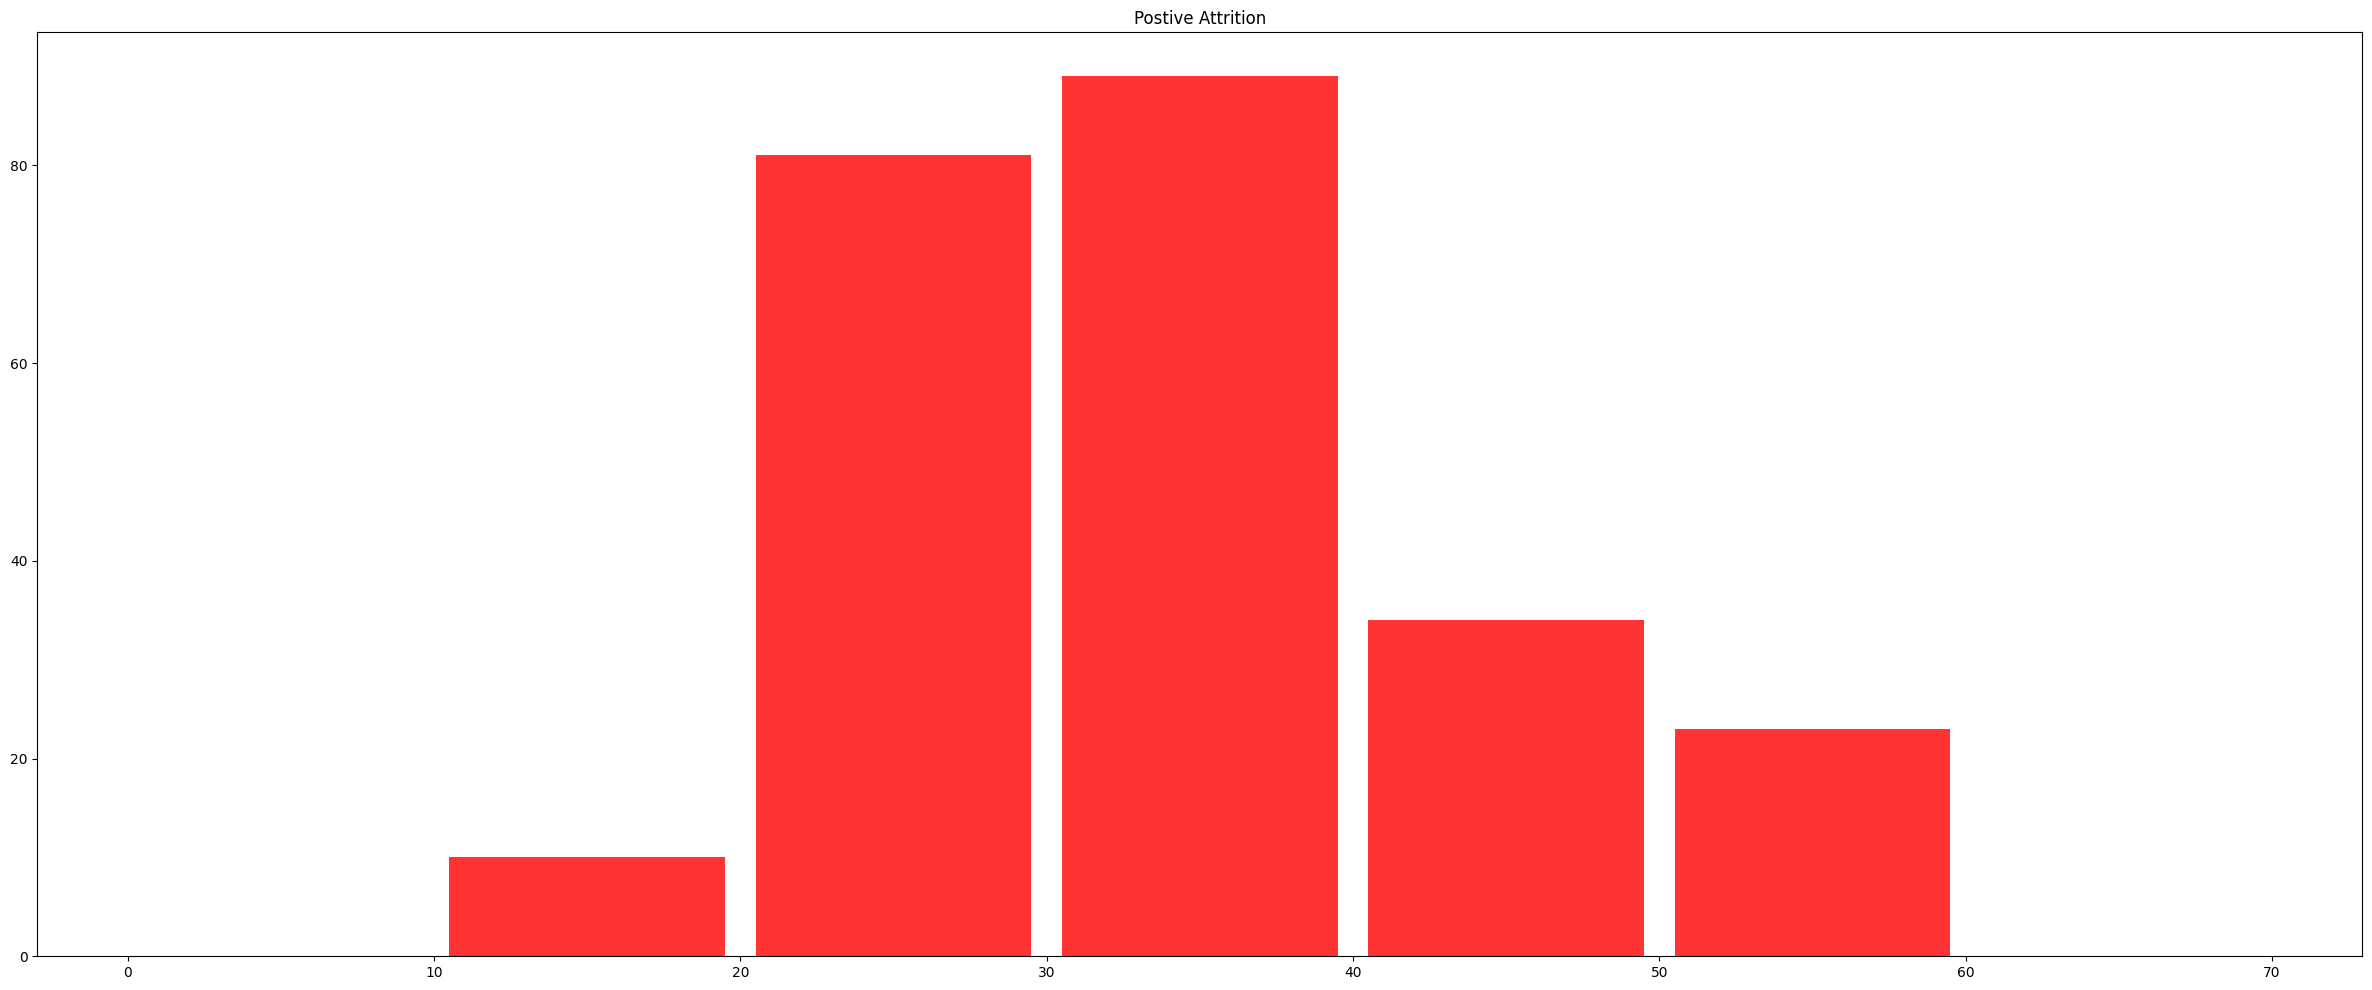

In [76]:
plt.hist(positive_attrition['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')
plt.title("Postive Attrition")


Text(0.5, 1.0, 'Negative Attrition')

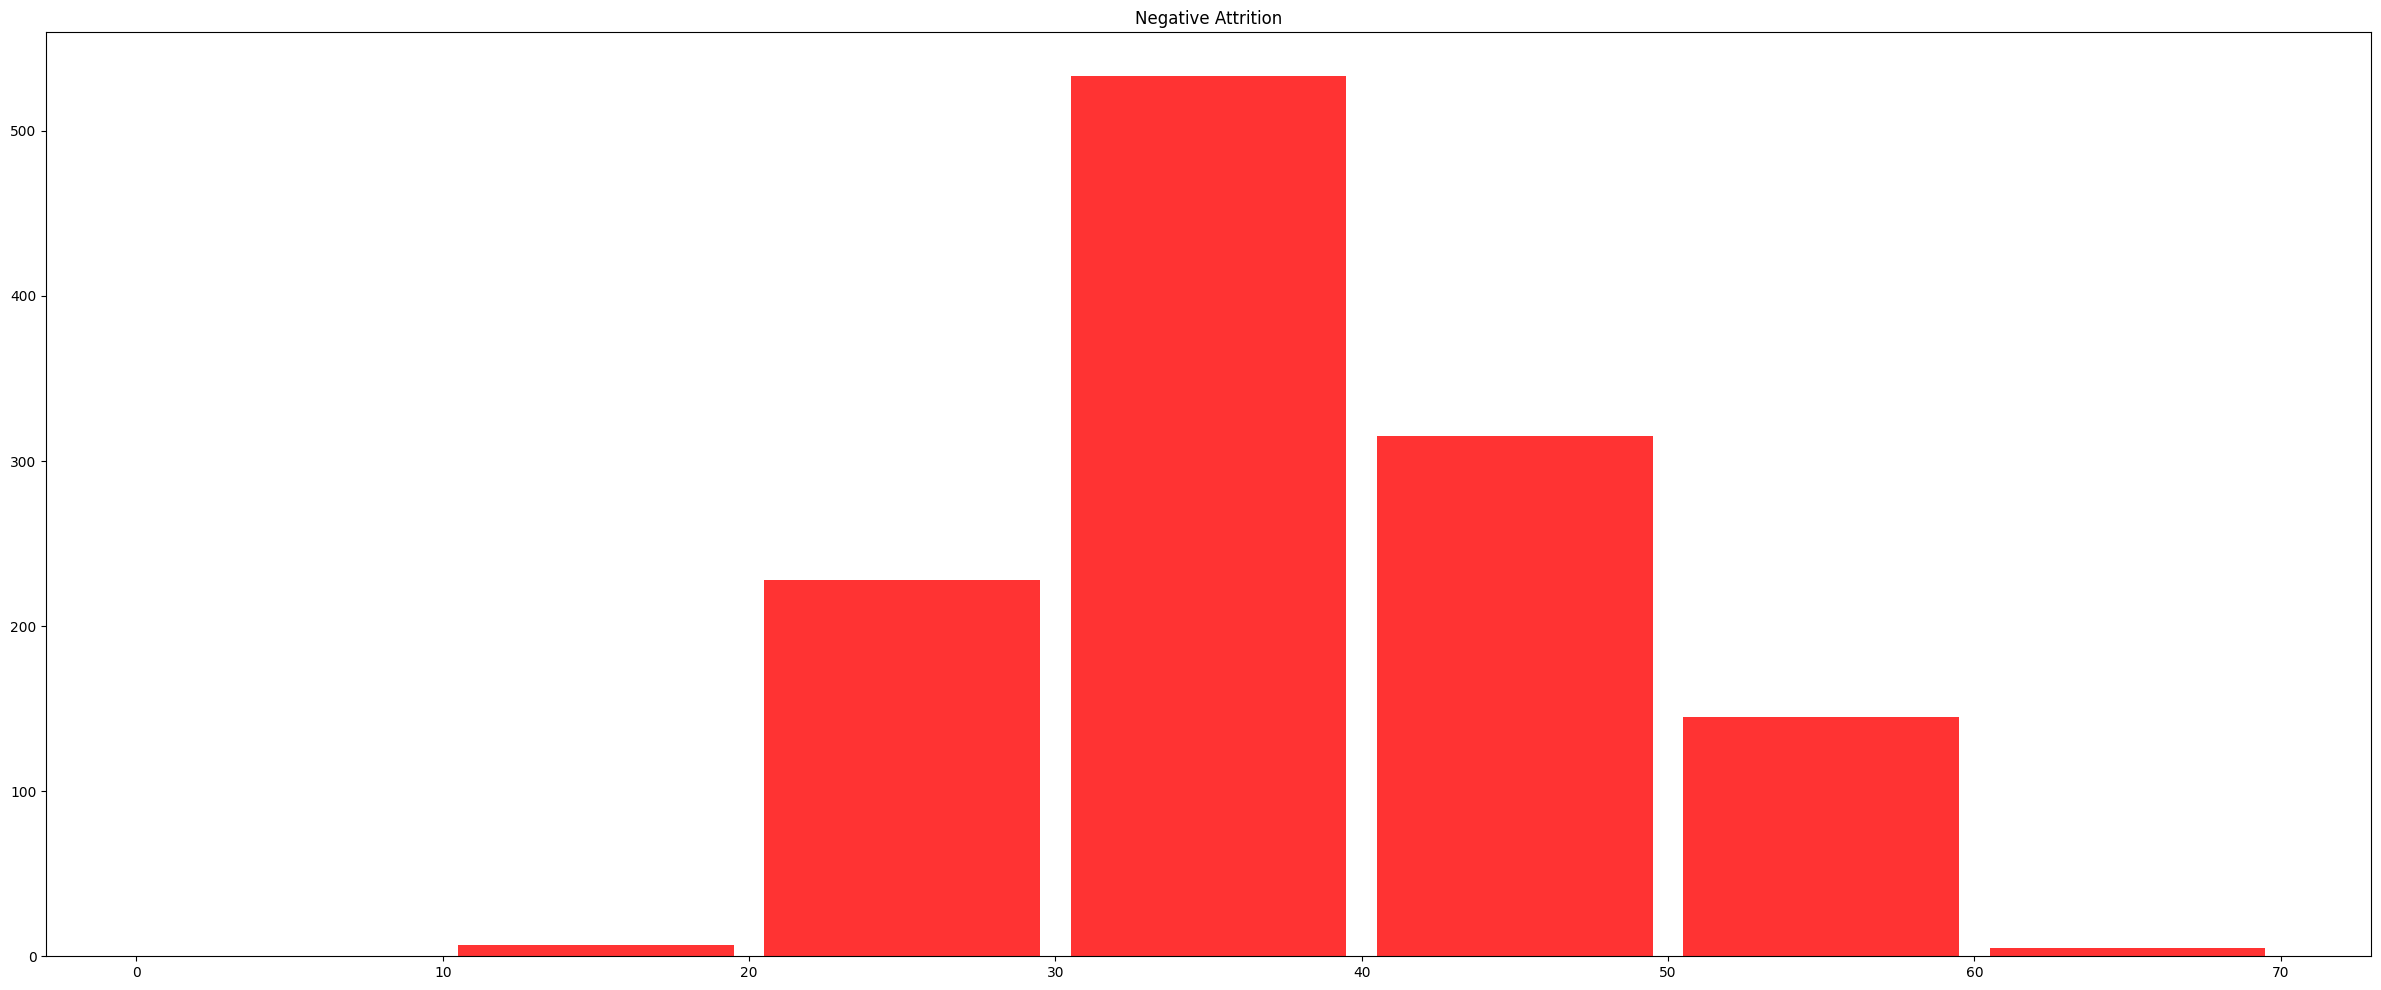

In [77]:
plt.hist(negative_attrition['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')
plt.title("Negative Attrition")

Binning age and comparing age group relation with attrition

In [86]:
df_age = df.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age']=3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4


In [79]:
df_age = pd.DataFrame({'count': df_age.groupby(["Age", "Attrition"]).size()}).reset_index()

In [80]:
df_age['Age-attrition'] = df_age['Age'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [81]:
df_age

,Age,Attrition,count,Age-attrition
0,0,0,12,0-0
1,0,1,16,0-1
2,1,0,274,1-0
3,1,1,84,1-1
4,2,0,534,2-0
5,2,1,85,2-1
6,3,0,288,3-0
7,3,1,34,3-1
8,4,0,125,4-0
9,4,1,18,4-1


# In the dataframe printed above the coloumn Age-Attrition value depicts

0-0 means Age< 20 and Non attrition 

0-1 means Age< 20 and attrition,

For Instance age group below 20 there are 28 employees among them 16 are prone to attrition



# Insights
Here, it can be observed that the age group between 30 to 40 are more prone to attrition

Eventhough while plotting for non attrition group it can observed that more employees are in the age group of 30 to 40

So, decided to make bins of age and count the level





# Findings

When comapring attrition in group of 20 and 40 it can be depicted that almost 35 % of population in age group of 20 and 30 is prone to attrition whereas the attrition rate is 16% in the age group 30 and 40

# Business Travel vs Attrition

There are 3 categories in this:

No travel (0).

Travel Frequently (1).

Travel Rarely

Attrition: 

No = 0 

 Yes = 1

Percentage of the business travelers when compared with attrition 


BusinessTravel     Attrition
Non-Travel         0            92.000000
                   1             8.000000
Travel_Frequently  0            75.090253
                   1            24.909747
Travel_Rarely      0            85.043145
                   1            14.956855
Name: Attrition, dtype: float64

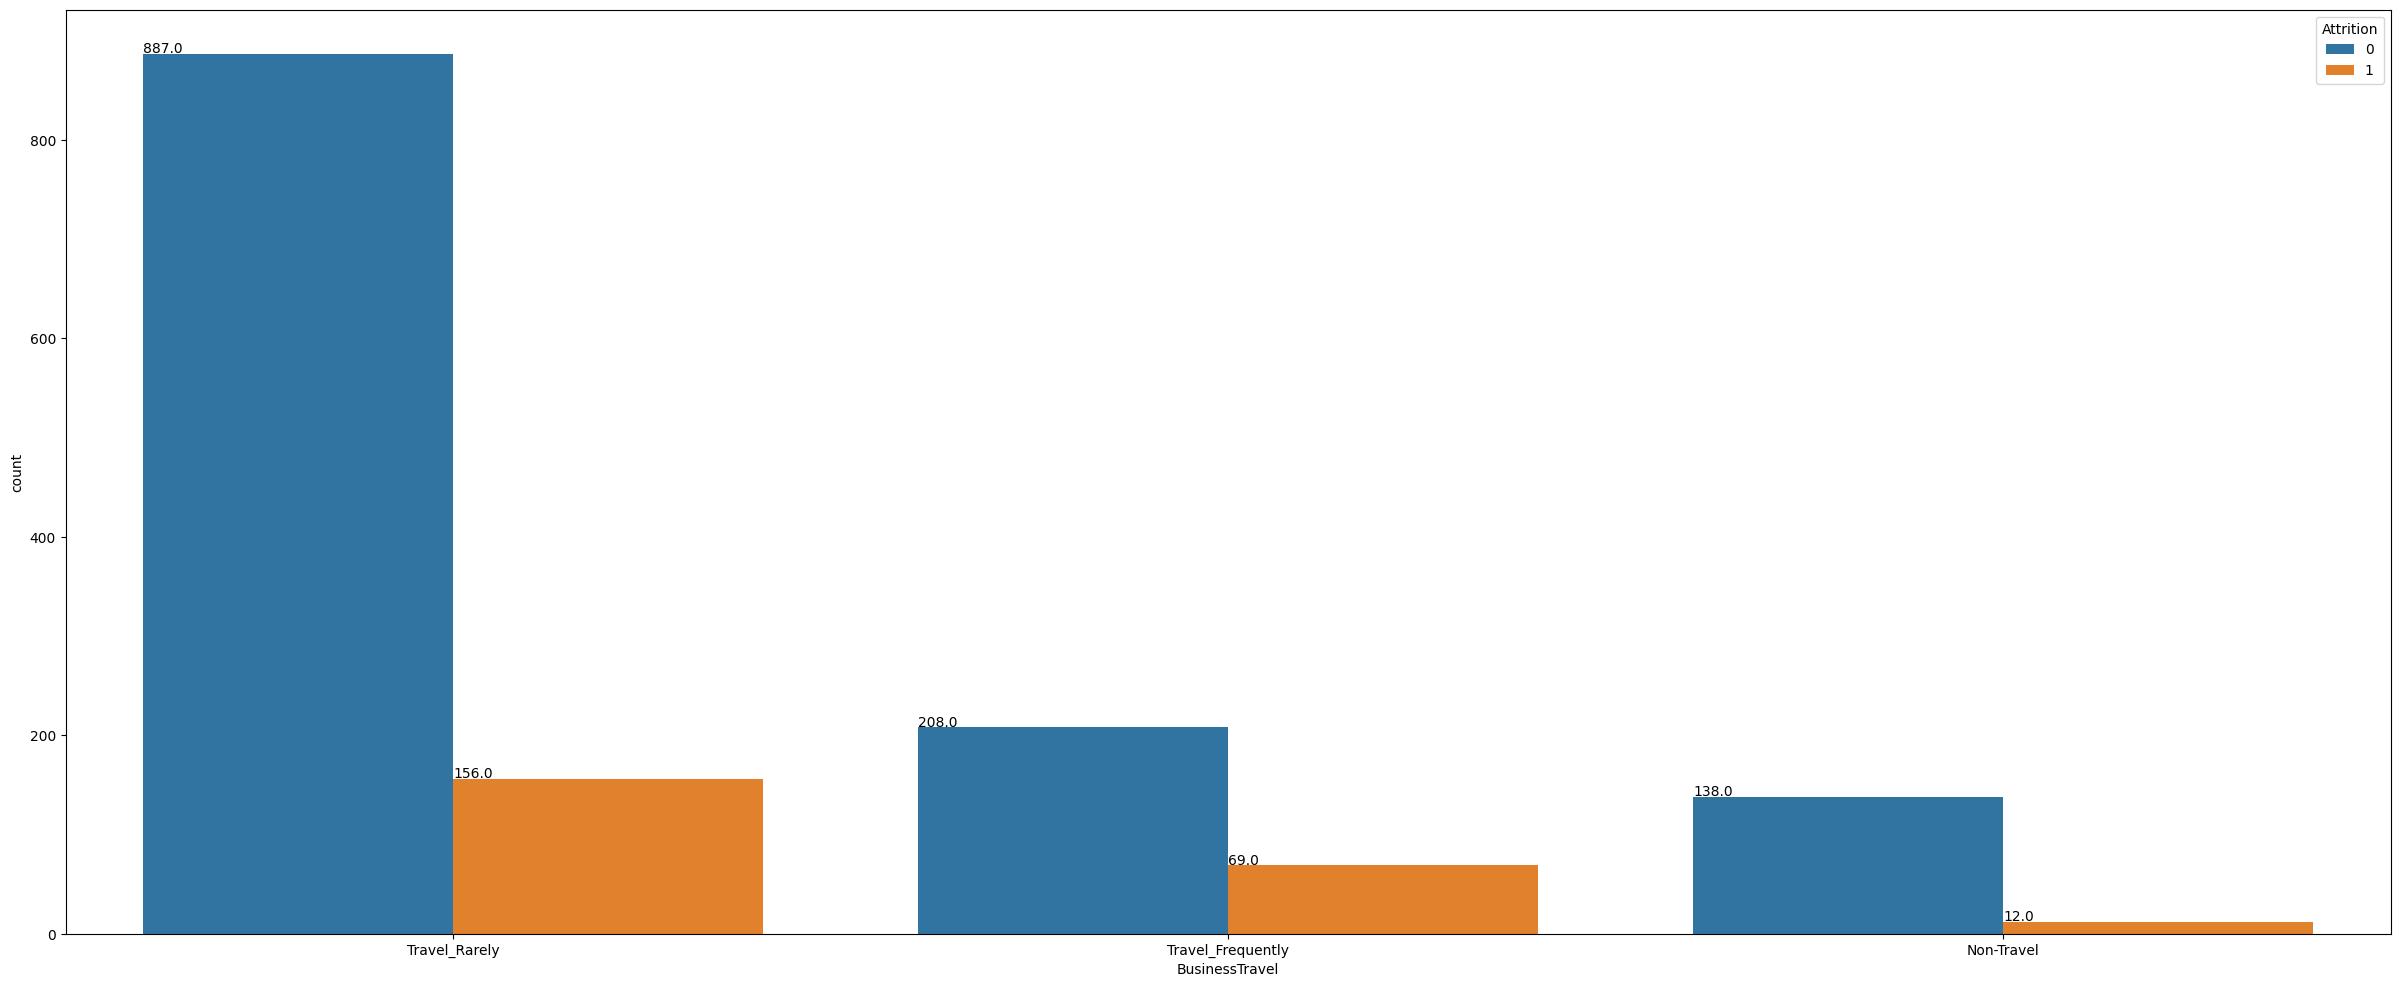

In [82]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
print("Percentage of the business travelers when compared with attrition ")
df.groupby("BusinessTravel")["Attrition"].value_counts(normalize=True)*100

# Insights


if we look at percentage distribution of employees who travel frequently it can be inferred that almost 25 % of employees how makes business travel is likely to quit

# Department Vs Attrition
There are three categories in department: 1. Human Resources: 0 2. Research & Development: 1 3. Sales: 2 Attrition: No = 0 and Yes = 1

Percentage of the department when compared with attrition 


Department  Attrition
1           0            86.160250
            1            13.839750
2           0            79.372197
            1            20.627803
3           0            80.952381
            1            19.047619
Name: Attrition, dtype: float64

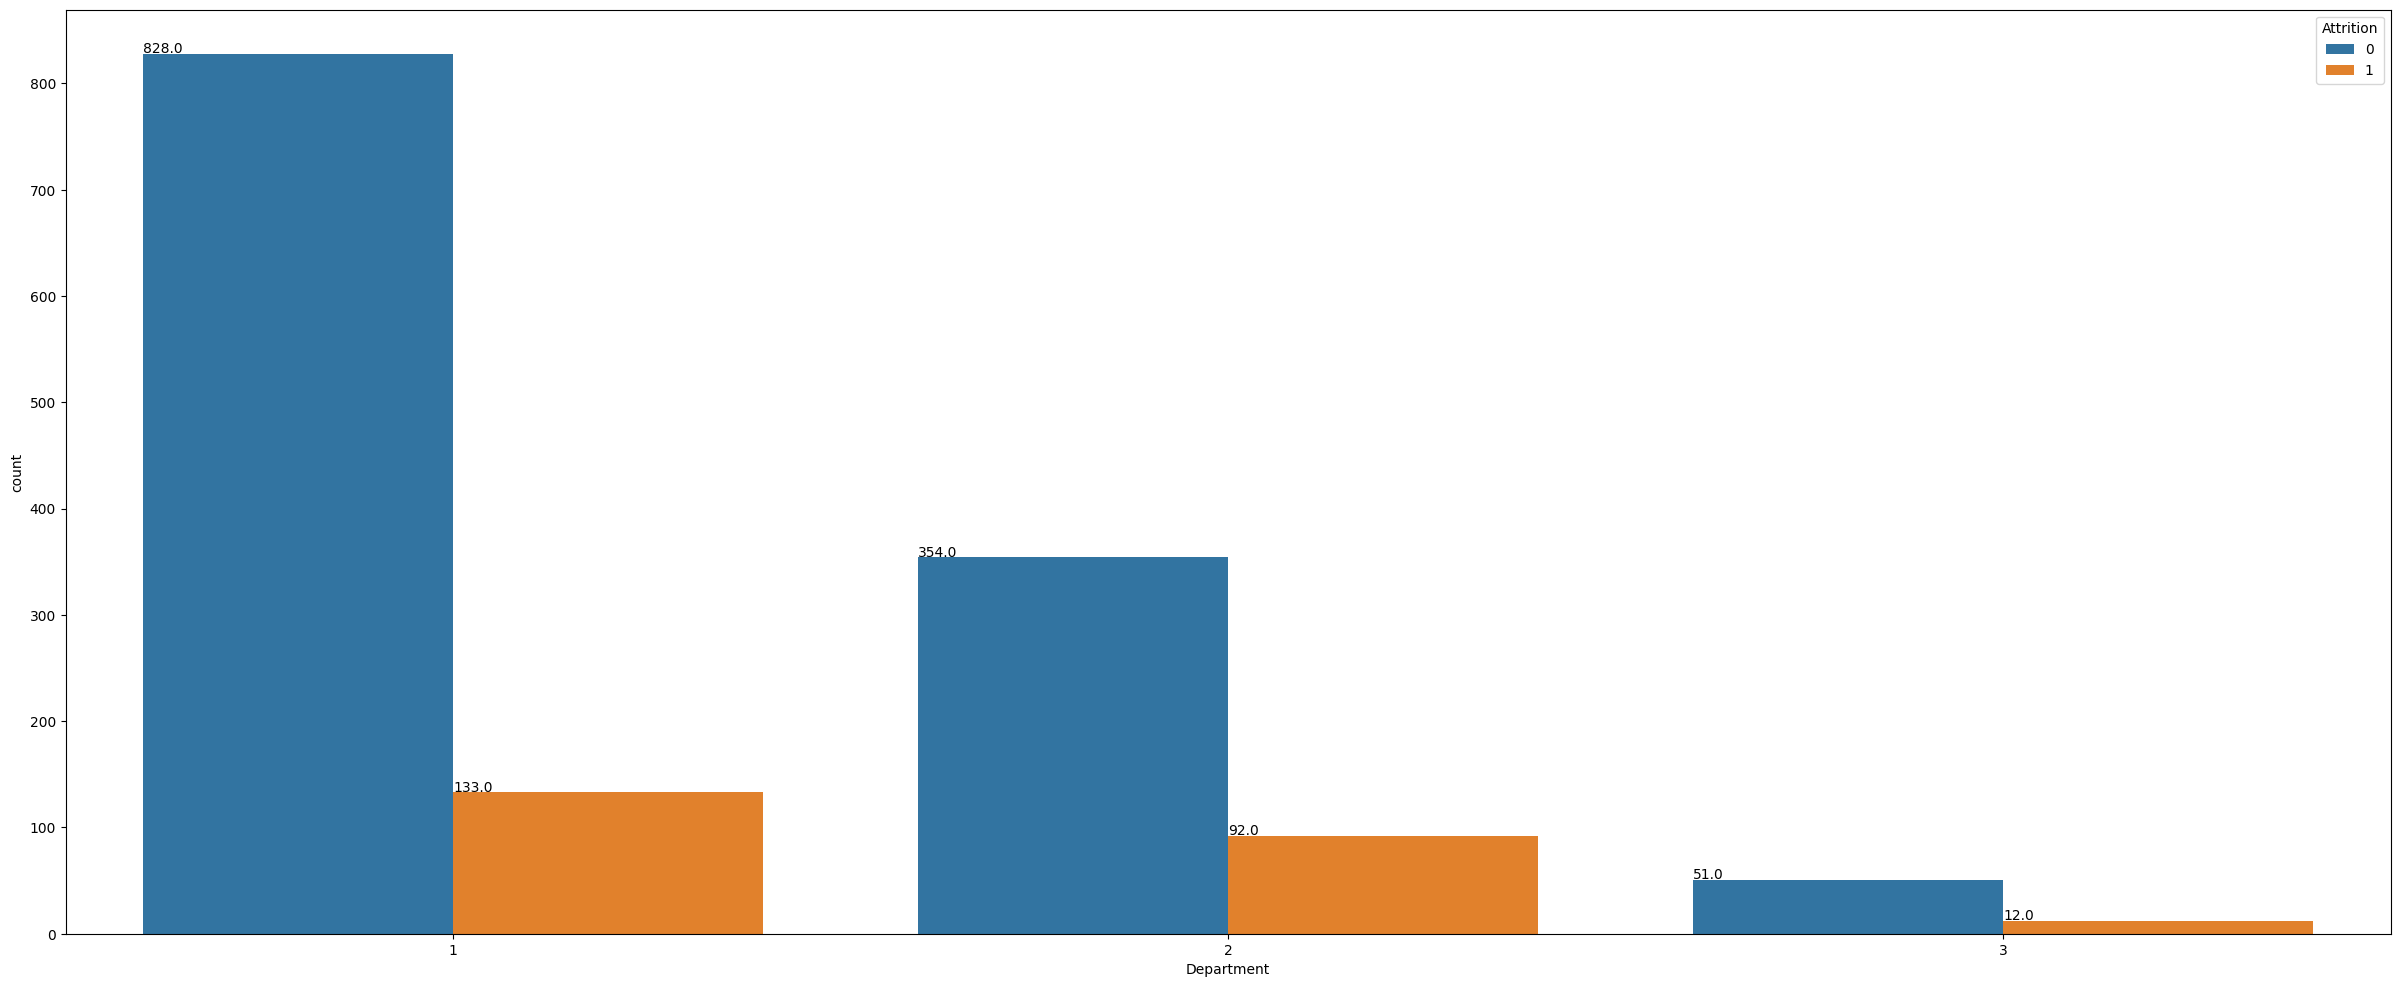

In [83]:
ax = sns.countplot(x="Department", hue="Attrition", data=df)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
print("Percentage of the department when compared with attrition ")
df.groupby("Department")["Attrition"].value_counts(normalize=True)*100

# Insights

Department sales (20.92 %) and human resourses (19.04) employee are more likely to resign than research and development when expressed in percentage terms

# Gender vs Attrition

In [84]:
df_genage = df.copy(deep=True)
df_genage.loc[df_genage['Age'] <= 20, 'Age'] = 0
df_genage.loc[(df_genage['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_genage.loc[(df_genage['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_genage.loc[(df_genage['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_genage.loc[(df_genage['Age'] > 50), 'Age'] = 4
df_genage = pd.DataFrame({'count': df_genage.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_genage['Gender-attrition'] = df_genage['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [85]:
df_genage

,Gender,Attrition,count,Gender-attrition
0,1,0,732,1-0
1,1,1,150,1-1
2,2,0,501,2-0
3,2,1,87,2-1


In [87]:
df_genag = df.copy(deep=True)
df_genag.loc[df_genag['Age'] <= 20, 'Age'] = 0
df_genag.loc[(df_genag['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_genag.loc[(df_genag['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_genag.loc[(df_genag['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_genag.loc[(df_genag['Age'] > 50), 'Age'] = 4
df_genag = pd.DataFrame({'count': df_genag.groupby(["YearsAtCompany", "Attrition"]).size()}).reset_index()
df_genag['YearsAtCompany-attrition'] = df_genag['YearsAtCompany'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [88]:
df_genag


,YearsAtCompany,Attrition,count,YearsAtCompany-attrition
0,0.0,0,28,0.0-1
1,0.0,1,16,0.0-0
2,1.0,0,112,1.0-1
3,1.0,1,59,1.0-0
4,2.0,0,100,2.0-0
5,2.0,1,27,2.0-0
6,3.0,0,108,3.0-0
7,3.0,1,20,3.0-0
8,4.0,0,91,4.0-0
9,4.0,1,19,4.0-0



Here,

Gender - 0 and Attrition - 0 ===> Female employees who will stay

Gender - 0 and Attrition - 1 ===> Female employees who will leave

Gender - 1 and Attrition - 0 ===> Male employees who will stay

Gender - 1 and Attrition - 1 ===> Male employees who will lea

 # Findings

 Age group of 20 - 30 years are likely to attrite 
 
female employees are more likely to stay as compared to male employees

Hypothesis will be as more number of employees stay near to office,As female employees opt to work in locations near to office they are less prone to attrition than male employees



# Monthly Income vs Attrition

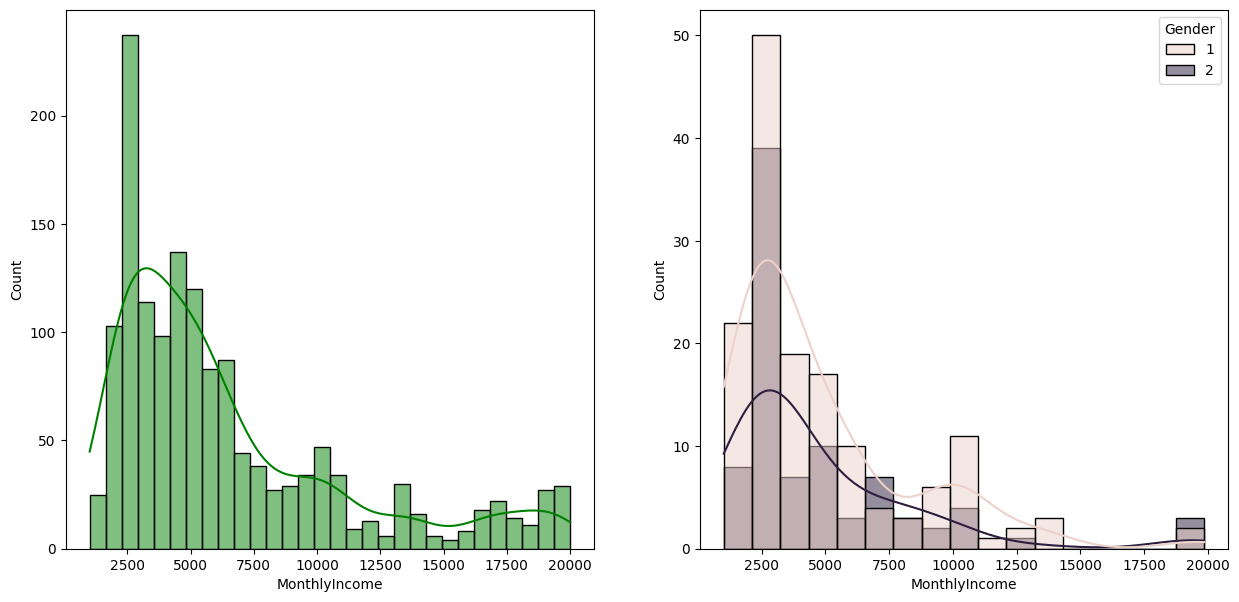

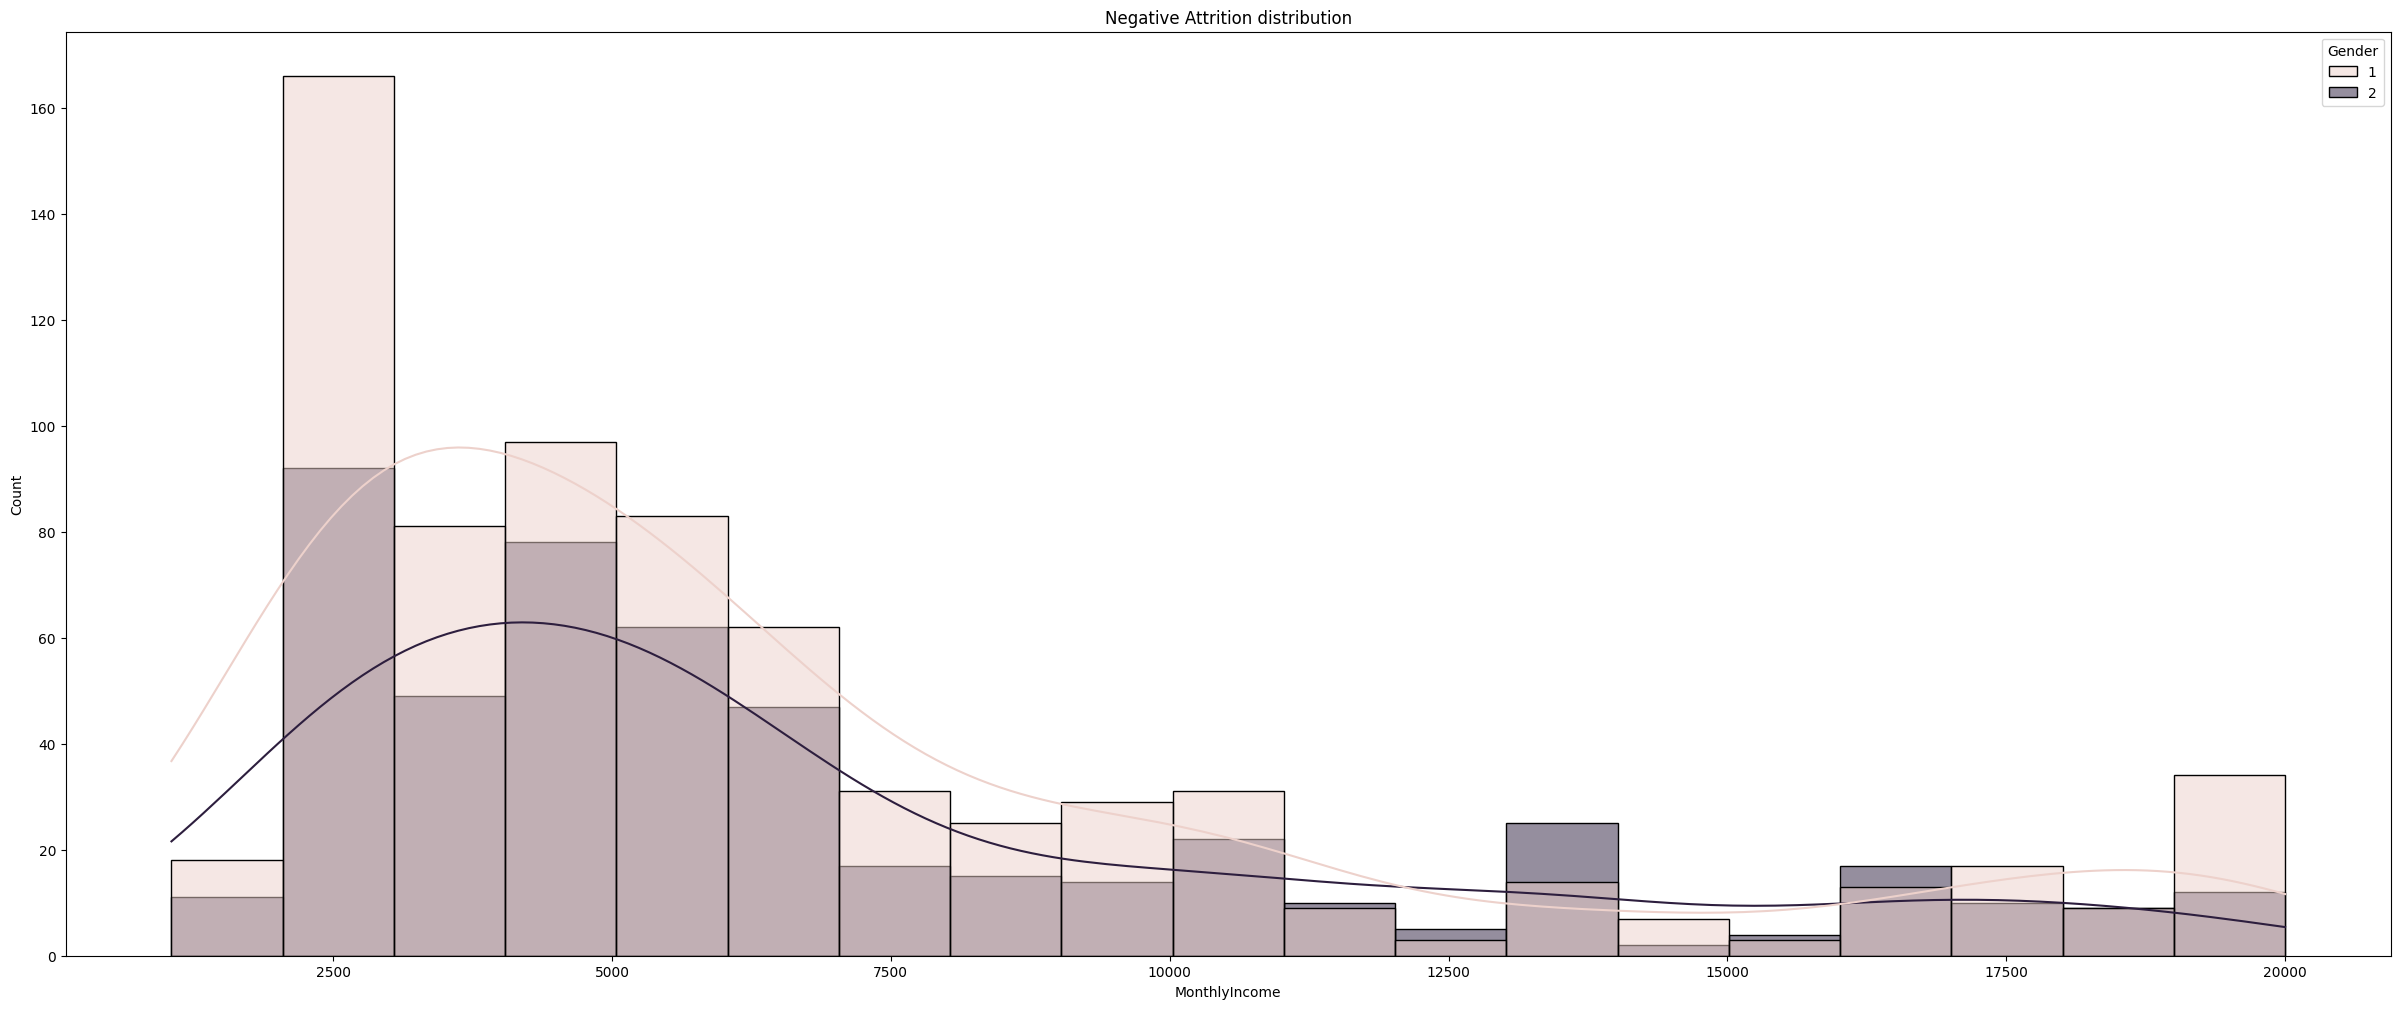

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='MonthlyIncome',bins=30,kde=True,color='g')
plt.subplot(122)

sns.histplot(data=positive_attrition,x='MonthlyIncome',kde=True,hue='Gender')
plt.show()
sns.histplot(data=negative_attrition,x='MonthlyIncome',kde=True,hue='Gender')
plt.title("Negative Attrition distribution")
plt.show()


# Insights
 Employees drawing lesser amount of salary is prone to attrition compared to employees employees drawing salary in higher bracket
 
 Subsequently, it can be observed that male employees are prone to attrition compared with female employees

 While in negative attrition the count of employees drawing salary greater than 3000  is more

 To conclude, In case of postive attrition  more employees were drawing salary in range of 2500 to 3000,indicating employees with lesser salary is prone to attrition while plotting negative attrition the count of employees drawing salary in range of 2500 to 3000 and most employees were drawing salary in range of 3500 to 5000

# Monthly Income vs Job Role

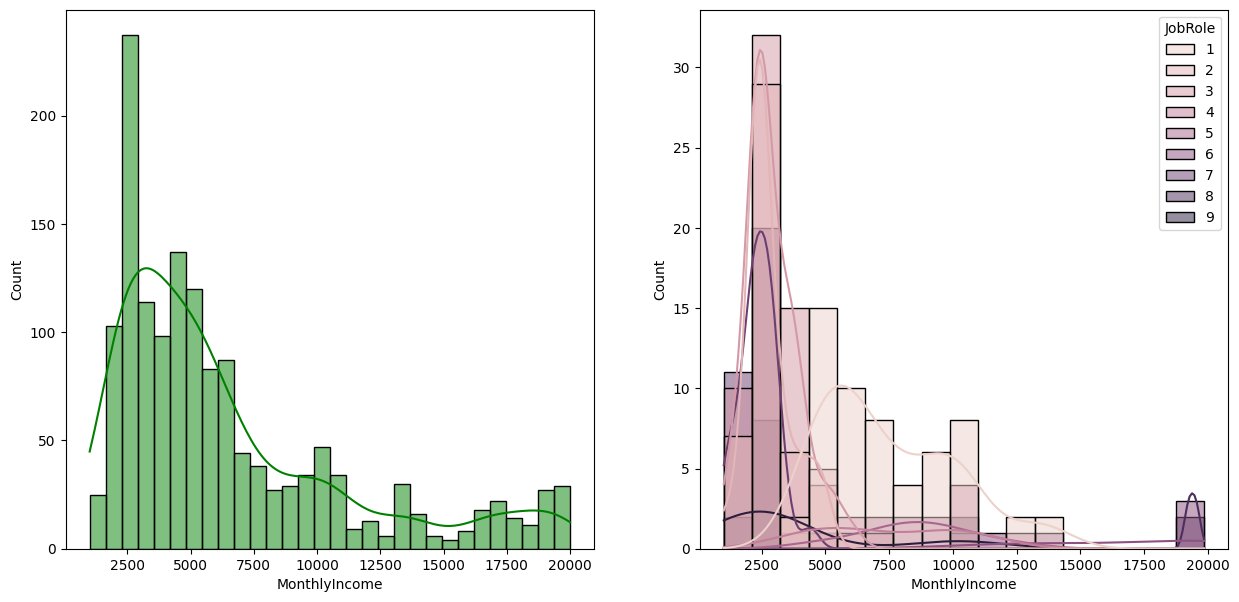

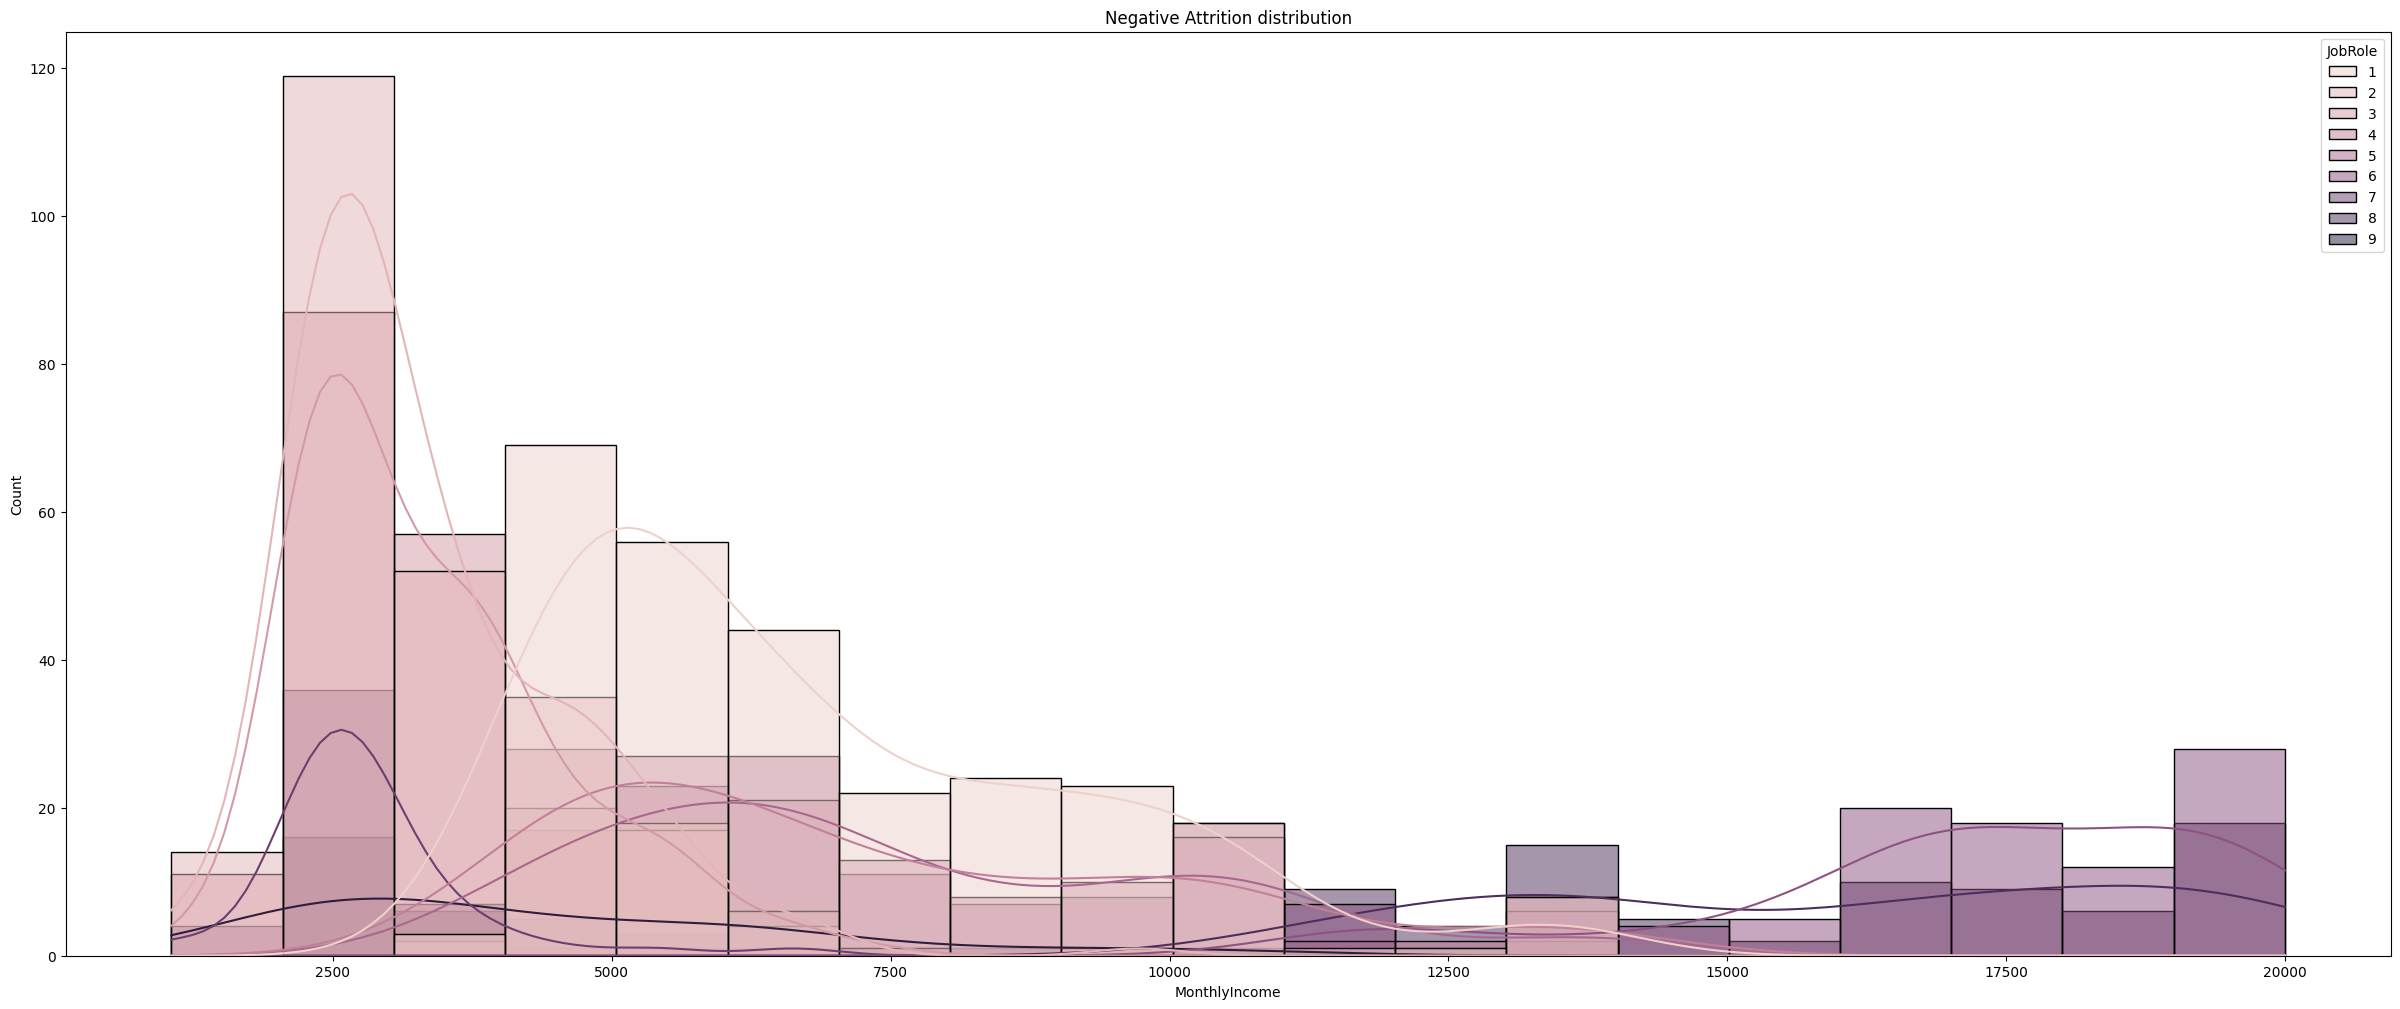

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='MonthlyIncome',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=positive_attrition,x='MonthlyIncome',kde=True,hue='JobRole')
plt.show()
sns.histplot(data=negative_attrition,x='MonthlyIncome',kde=True,hue='JobRole')
plt.title("Negative Attrition distribution")
plt.show()

In [102]:
df_jrole = pd.DataFrame({'count': df.groupby(["JobRole", "Attrition"]).size()}).reset_index()
df_jrole.head()

,JobRole,Attrition,count
0,1,0,269
1,1,1,57
2,2,0,245
3,2,1,47
4,3,0,197


In [103]:
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]

In [104]:
df_jrole_1

,JobRole,Attrition,count
1,1,1,57
3,2,1,47
5,3,1,62
7,4,1,10
9,5,1,9
11,6,1,5
13,7,1,33
15,8,1,2
17,9,1,12


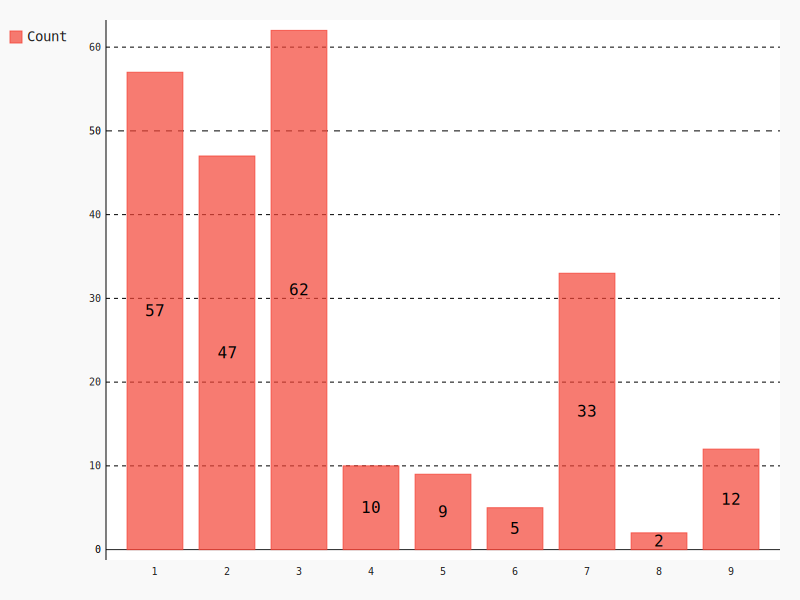

In [106]:
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(1,10))
chart.add('Count', df_jrole_1['count'])
#chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))

# Insights

Job roles Reserach scientists, laboratory technician and Manufacturing Director drawing lesser salary are more prone to attrition

Job roles prone to Attrition

Labortary Technician --- 62/259 ---> 29 %

Sales Executive group --- 57/326 ---> 17%

Research Scientist Group --- 47/292 ---> 17%

Research director Group --- 33/83 ---> 40%

# Job Involvement vs Attrition

In [113]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(dataorginal.JobInvolvement,dataorginal.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


# JobInvolvement Vs Age




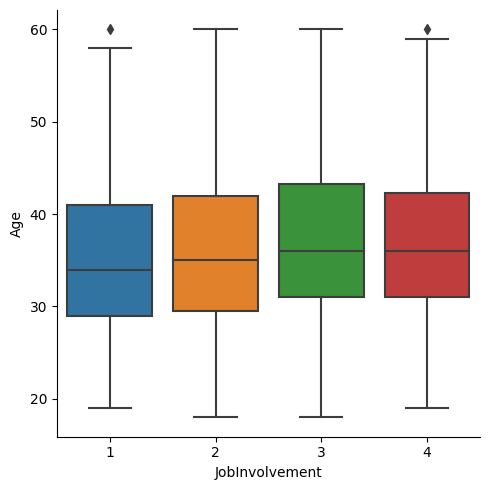

In [95]:
sns.catplot(data=dataorginal, x="JobInvolvement", y="Age",errorbar=("pi", 95), kind="box")


cross tabulation between attrition and JobSatisfaction


In [127]:
pd.crosstab(dataorginal.JobSatisfaction,dataorginal.Attrition)

Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


# Insights

Comparitively, It can be infered that employees with lesser job involvement are prone to attrition

And employees who are younger tends to have lesser job involvement

<Axes: xlabel='JobSatisfaction', ylabel='count'>

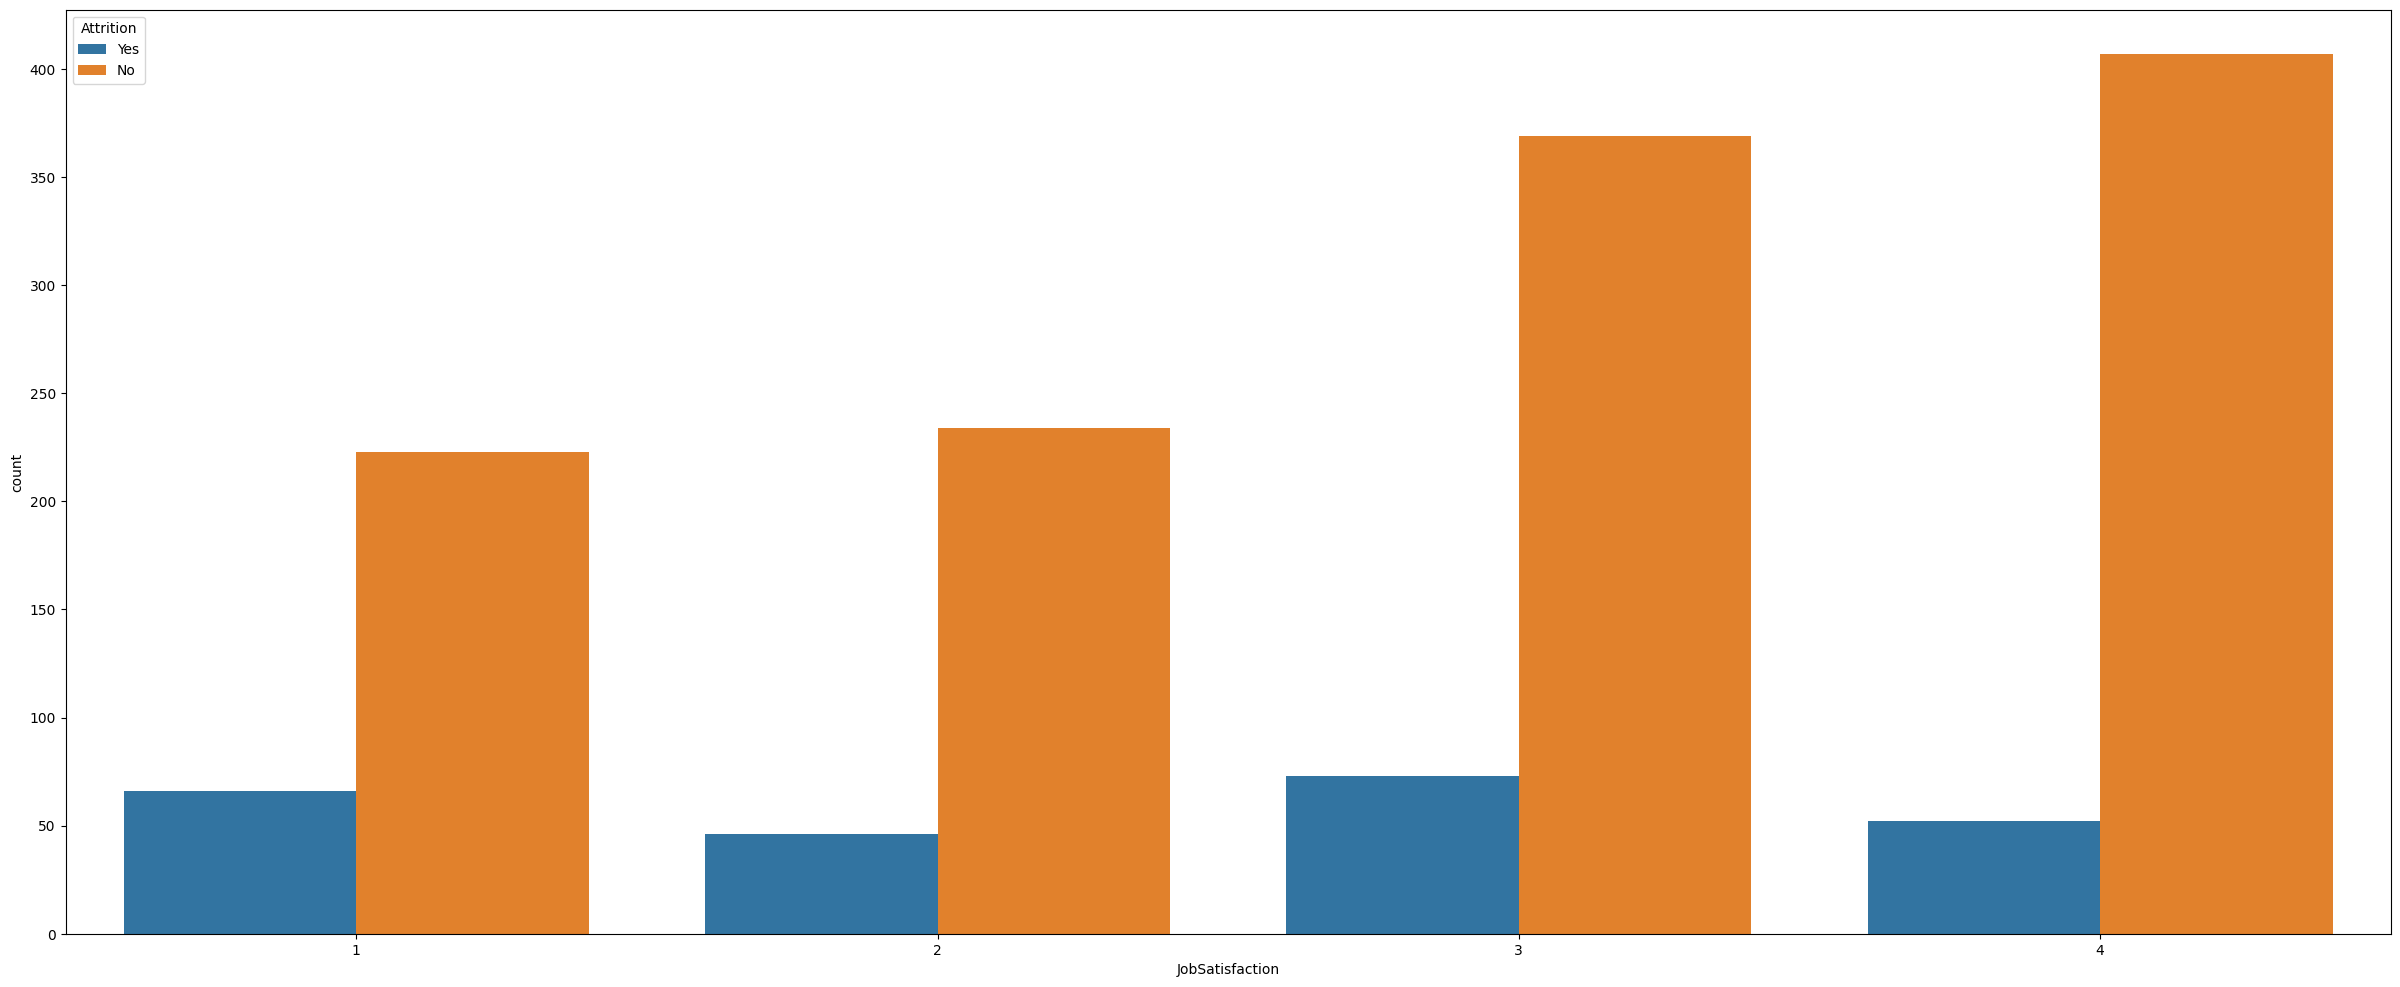

In [129]:
sns.countplot(x="JobSatisfaction", hue="Attrition", data=dataorginal)


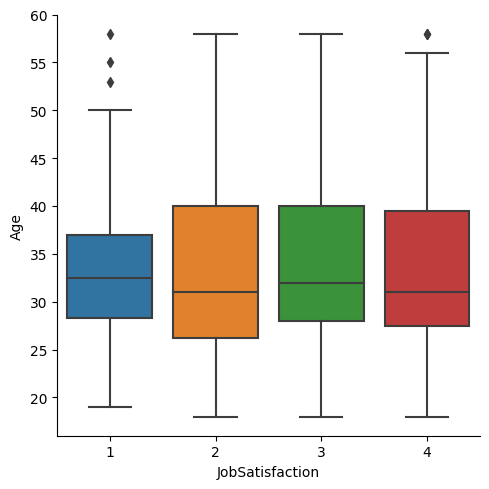

In [98]:
sns.catplot(data=positive_attrition, x="JobSatisfaction", y="Age",errorbar=("pi", 95), kind="box")

# Insights

Comparitively, It can be infered that employees with lesser job satisfaction are prone to attrition

# Job Role Vs Attrition

<Axes: xlabel='JobRole', ylabel='Attrition'>

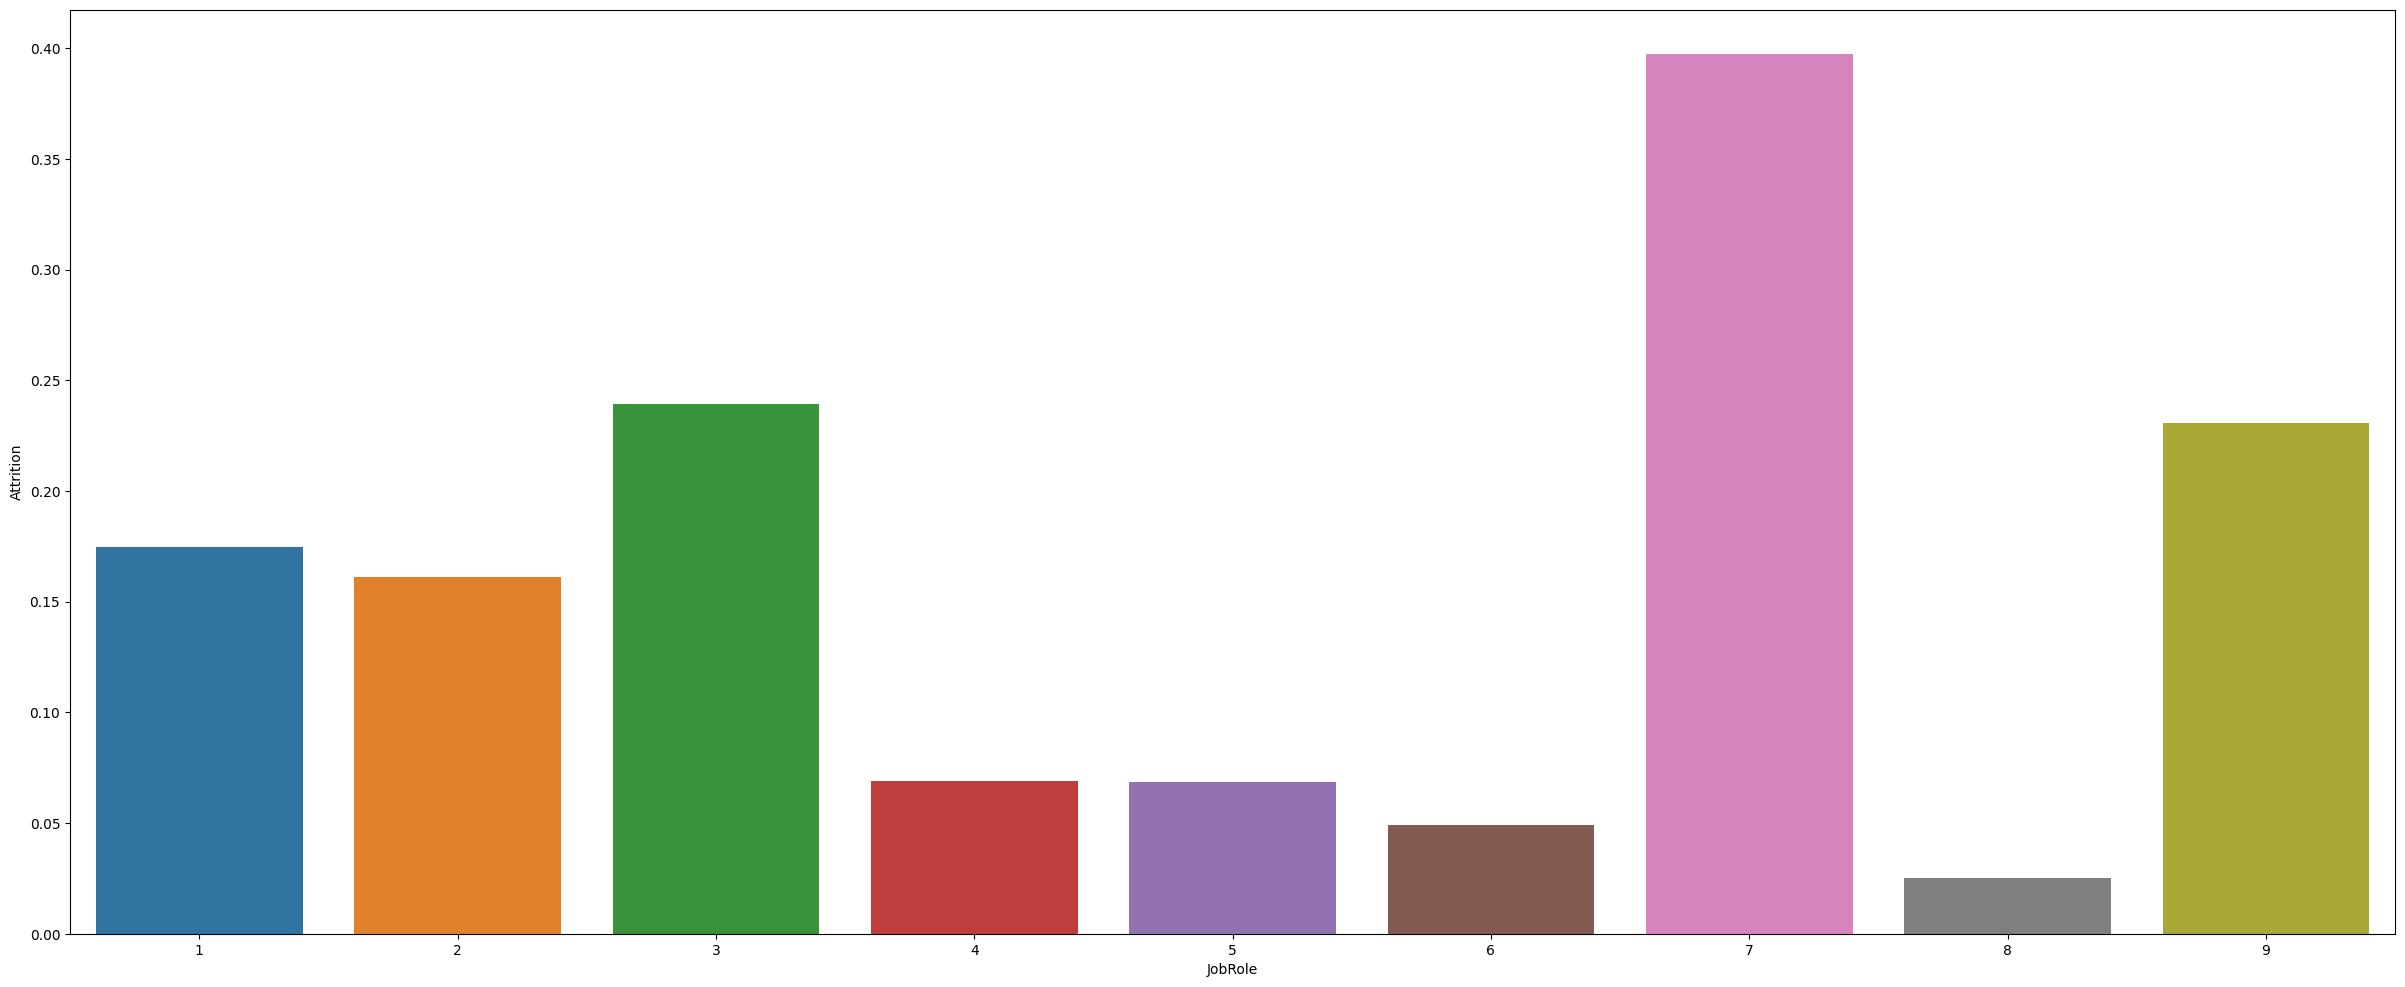

In [133]:
sns.barplot(x = 'JobRole', y = 'Attrition' ,data=df,ci=None)

# Insights

 Sales representative are more prone to attrition

Followed by, Labortary Technician then Human Resourses,


 Tabular form depicted below

In [136]:
pd.crosstab(dataorginal.JobRole,dataorginal.Attrition)

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


# Work Life Balance Vs Attrition

<Axes: xlabel='WorkLifeBalance', ylabel='Attrition'>

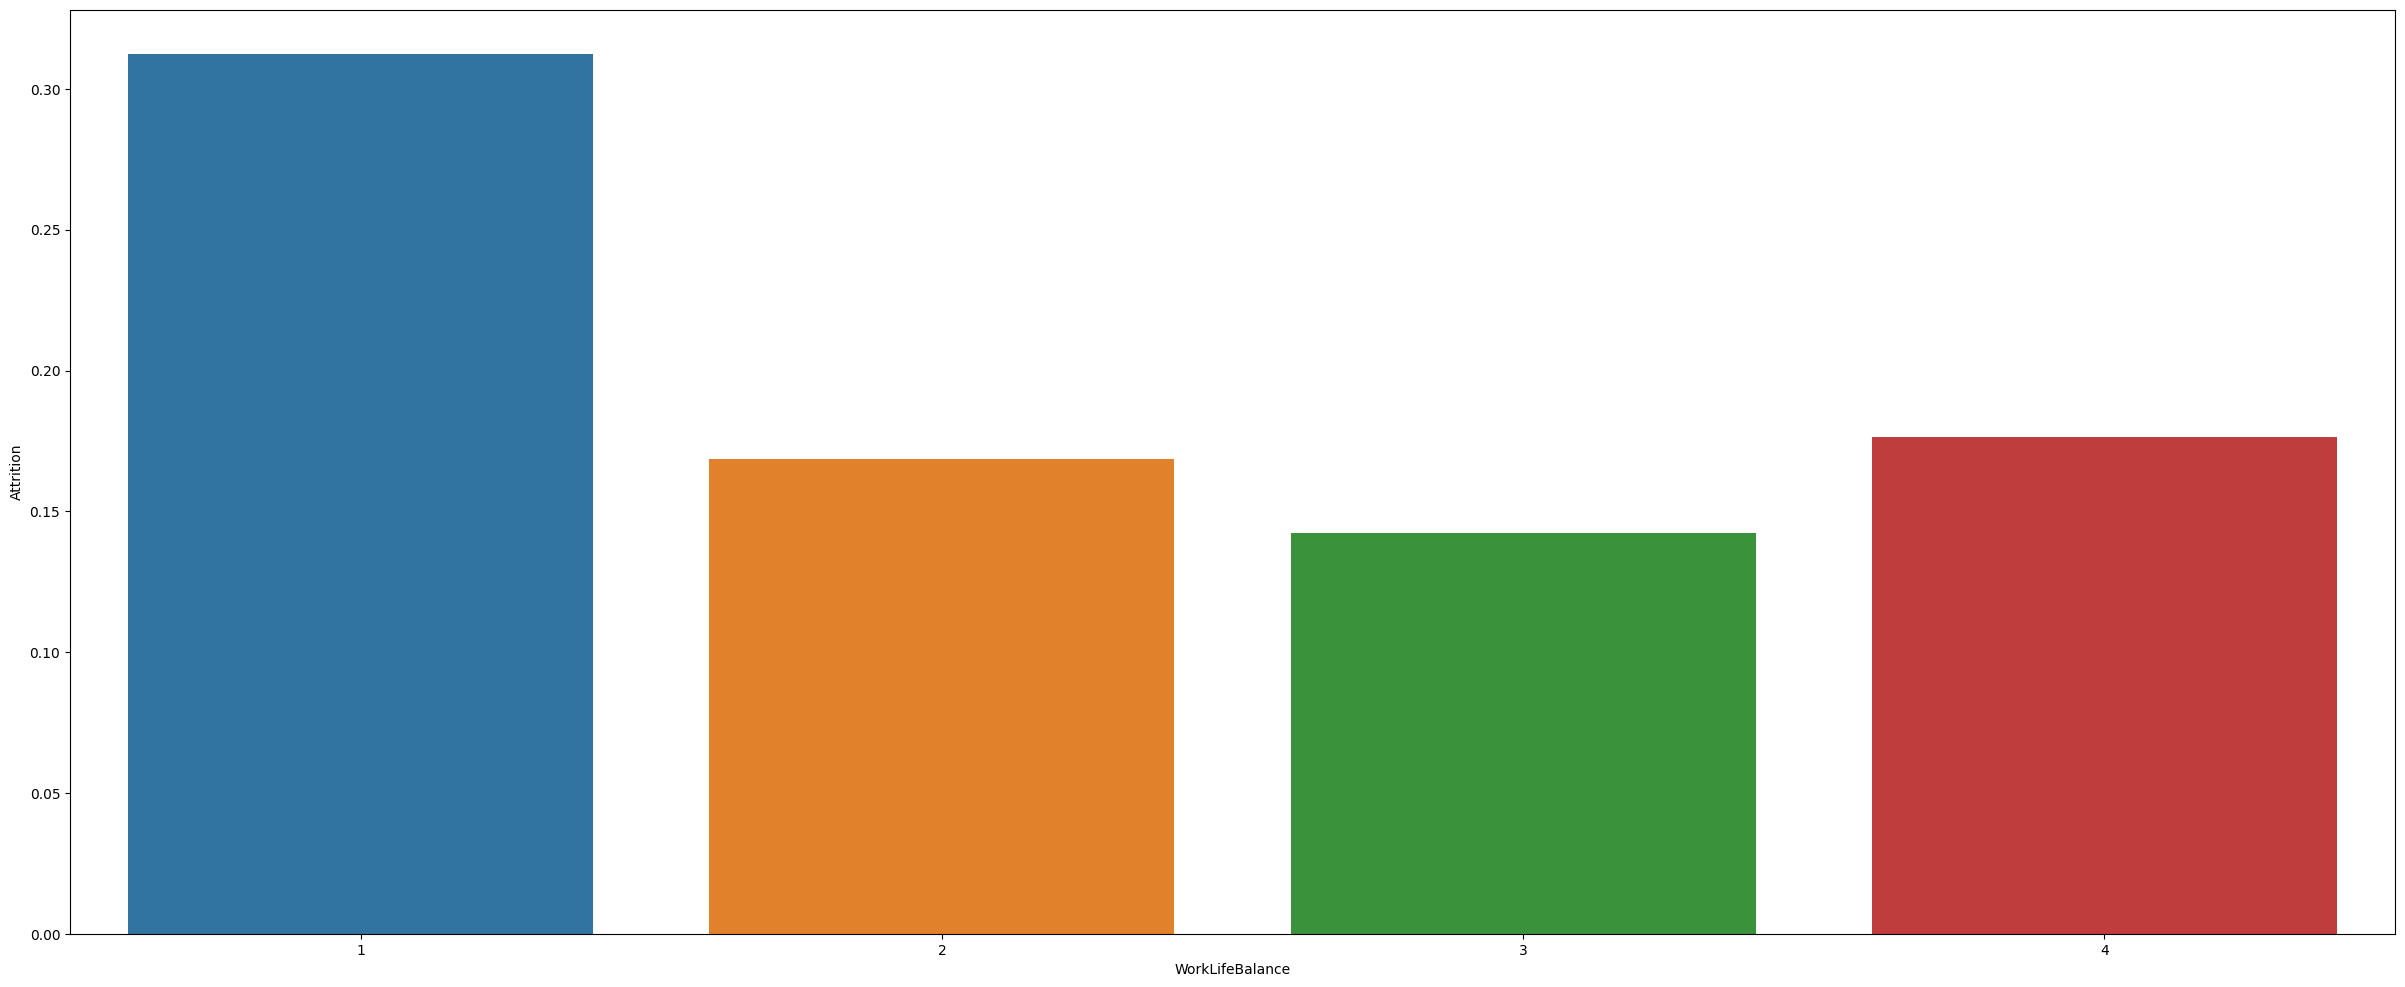

In [137]:
sns.barplot(x = 'WorkLifeBalance', y = 'Attrition' ,data=df,ci=None)

# Insights
Employees rating lesser for worklife balance are more prone to attrition

<Axes: xlabel='OverTime', ylabel='Attrition'>

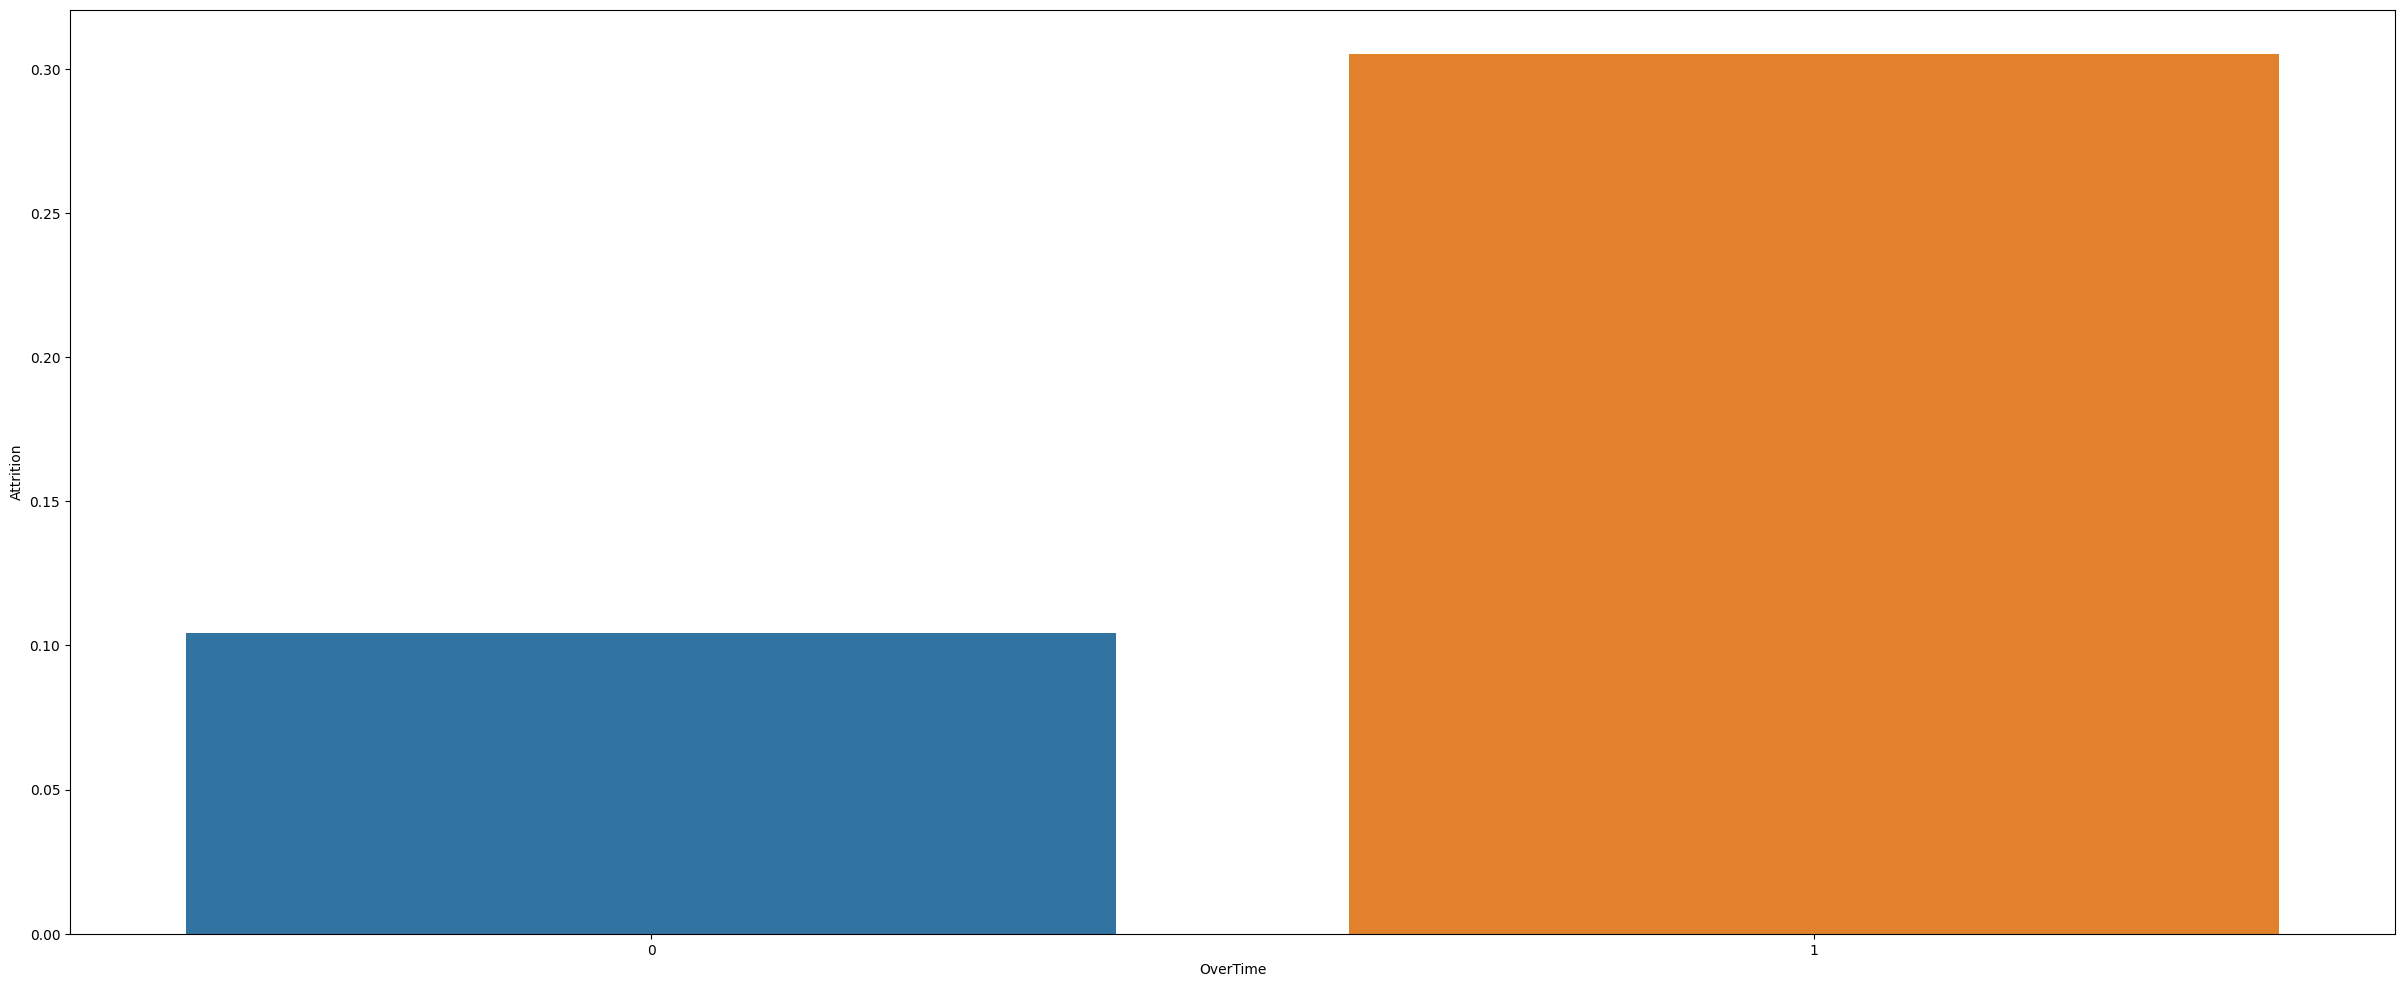

In [139]:
sns.barplot(x = 'OverTime', y = 'Attrition' ,data=df,ci=None)

# Insights

Employees working overtime is more prone to attrition

In [143]:
pd.crosstab(dataorginal.EducationField,dataorginal.Attrition)

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


# Comparing Job Role and Education Field Vs Attrition

In [83]:
df.groupby(['JobRole','EducationField'], as_index=False)[['Attrition']].mean().sort_values(by=['Attrition'],ascending=False).head(5)

,JobRole,EducationField,Attrition
29,7,3,0.521739
39,9,5,0.500000
30,7,4,0.500000
31,7,5,0.461538
12,3,5,0.421053


# Insights

Employees with Techincal Degree, Marketting and Human resources are more prone to attrition

Further, Most Attrition prone job roles Labortary technicians, Human resources and sales representatives are from t education he above mentioned job roles

# Education vs Attrition

There are five categories
1. Below College - 1 
2. College - 2 
3. Bachelor - 3 
4. Master - 4 
5. Doctor - 5

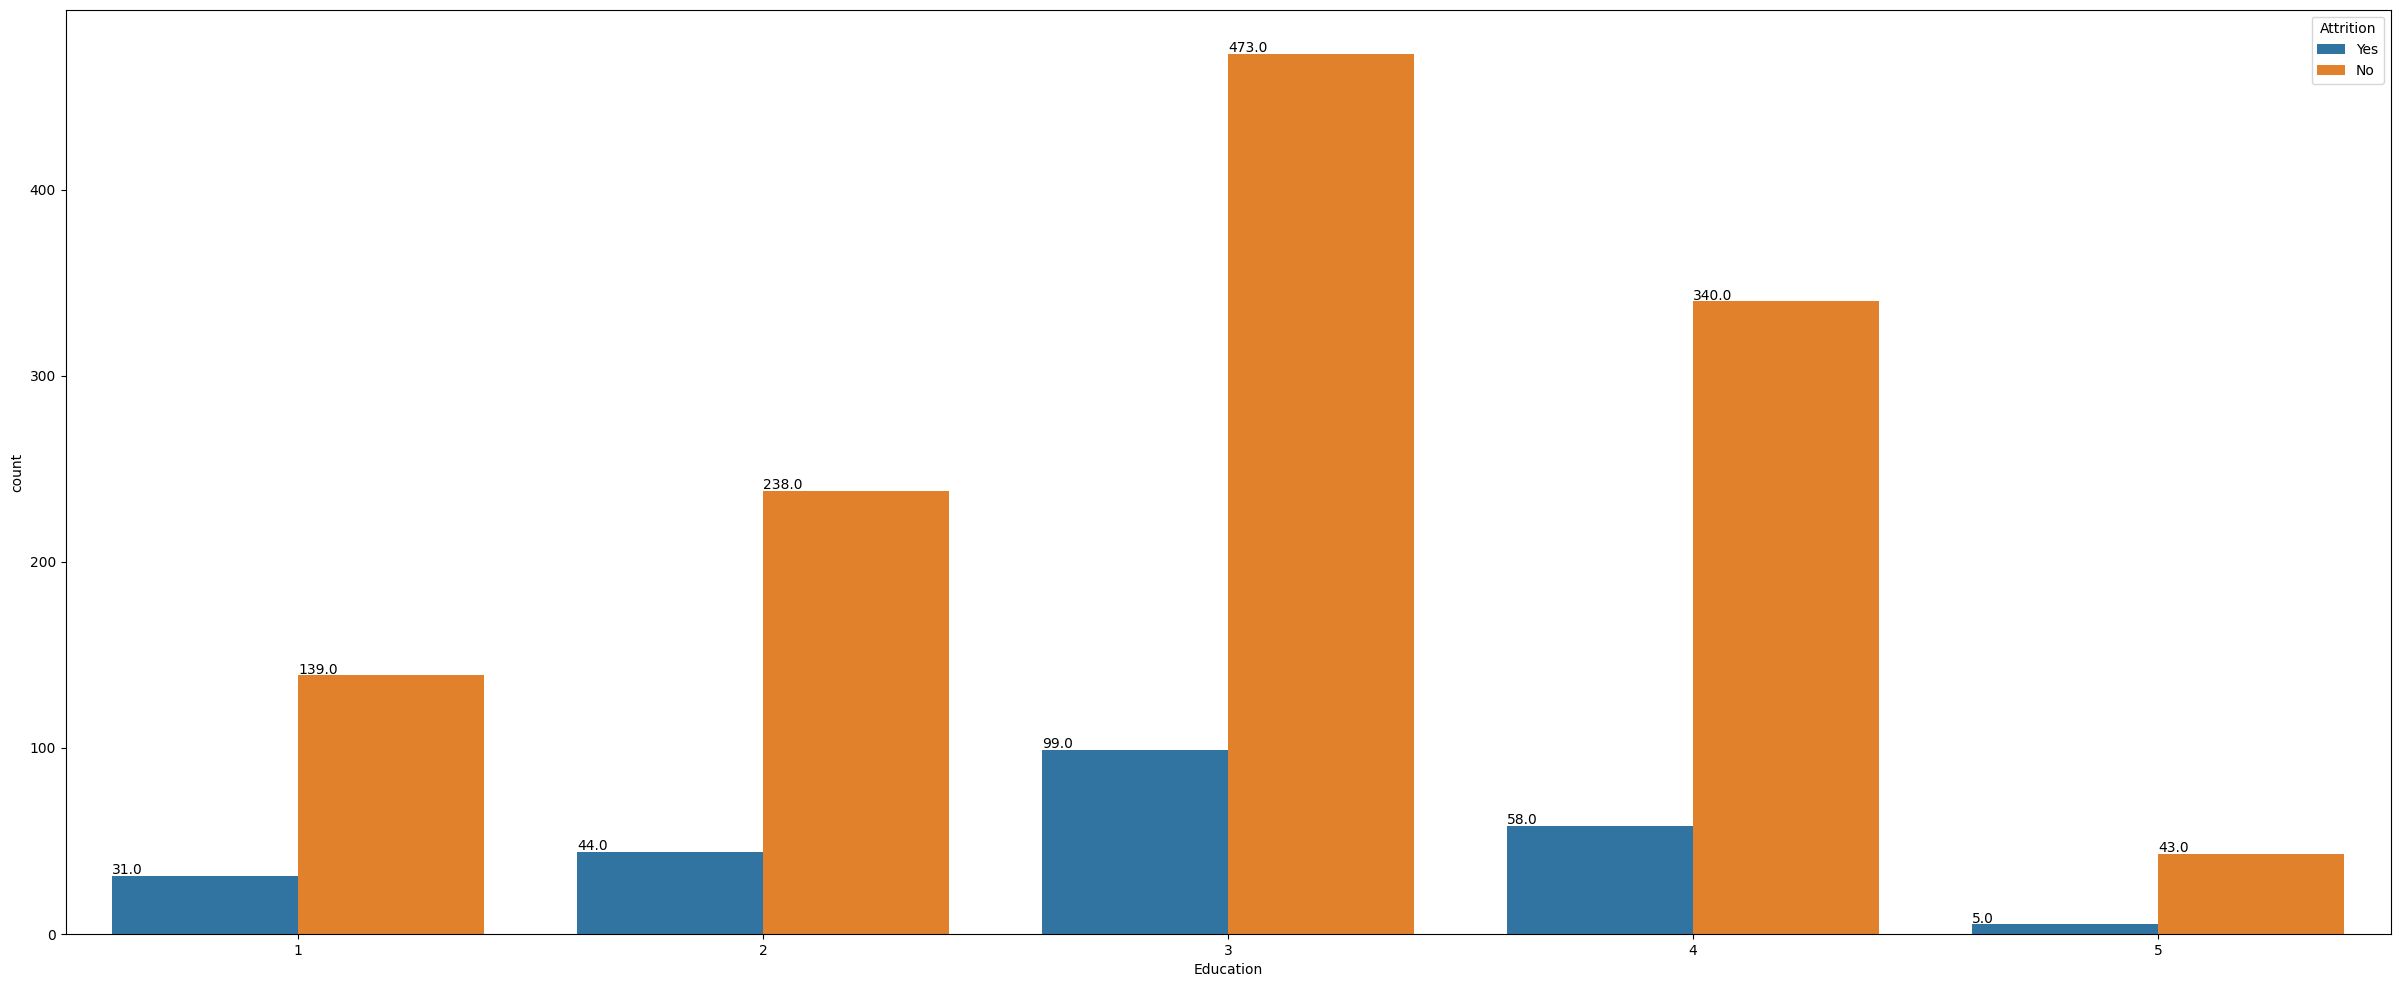

In [154]:
ax = sns.countplot(x="Education", hue="Attrition", data=dataorginal)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

# Insights
It can be observed that the most of employees are having masters and bachelors as educational qualification, and they are prone to attrition

A hypothetical conclusion can be that young educated graduates and under graduates are prone too attrition as they look for carrer advancement

In [48]:
role_income = df.groupby('JobRole', as_index=False)[['MonthlyIncome', 'Attrition']].mean().sort_values(
    by=['MonthlyIncome'],ascending=False)
role_income

,JobRole,MonthlyIncome,Attrition
5,6,17181.676471,0.049020
7,8,16033.550000,0.025000
4,5,7528.763359,0.068702
3,4,7295.137931,0.068966
0,1,6924.279141,0.174847
8,9,4235.750000,0.230769
1,2,3239.972603,0.160959
2,3,3237.169884,0.239382
6,7,2626.000000,0.397590


# Insights:

Here the Job roles Labortary scientist, Human Resources and labortary technician which are attrition prone are drawing least monthly salary. Infact, Human Resources and labortary technician are ones with  lesser amount of monthly salary

# Comparing Job Roles with Job satisfaction and its relation to attrition 

In [46]:
df.groupby('JobRole', as_index=False)[['JobSatisfaction','Attrition']].mean().sort_values(by=['JobSatisfaction'],ascending=False)

,JobRole,JobSatisfaction,Attrition
4,5,2.786260,0.068702
1,2,2.773973,0.160959
0,1,2.754601,0.174847
6,7,2.734940,0.397590
5,6,2.705882,0.049020
7,8,2.700000,0.025000
2,3,2.691120,0.239382
3,4,2.682759,0.068966
8,9,2.557692,0.230769


 # Insights:

 Here, It can be observed that the Job roles Sales representative, Lab technician and Human resourses which identified as attrition prone is having lesser Job satisfaction. 

# TrainingTimeLastYear Vs Attrition

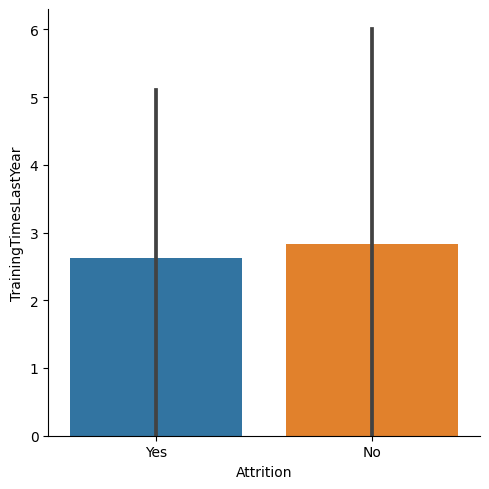

In [53]:
sns.catplot(data=dataorginal, x="Attrition", y="TrainingTimesLastYear",errorbar=("pi", 95), kind="bar")


In [55]:
df.groupby('TrainingTimesLastYear', as_index=False)[['Attrition']].mean().sort_values(by=['Attrition'],ascending=False)

,TrainingTimesLastYear,Attrition
0,0,0.277778
4,4,0.211382
2,2,0.179159
3,3,0.140530
1,1,0.126761
5,5,0.117647
6,6,0.092308


# Insights: 

Employees attending Training session is related to attrition. For instance,

It can be observed that employees who havent attended a single traing session is more probable for attrition and employees who have attended maximum training session are less prone to attrition

# NumOfCompaniesWorked Vs Attrition

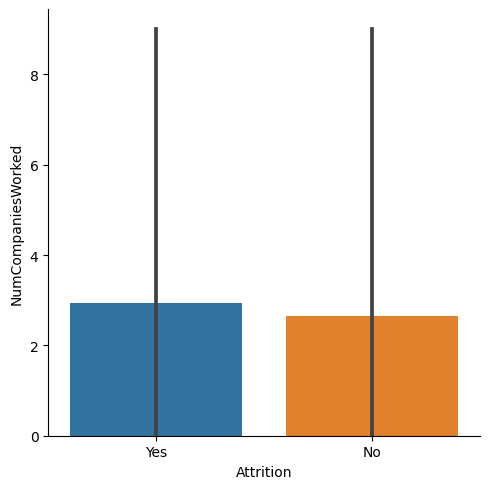

In [60]:
sns.catplot(data=dataorginal, x="Attrition", y="NumCompaniesWorked",errorbar=("pi", 95), kind="bar")

# INSIGHTS

Employees who have worked in more than 5 companies are more likely to attrition, this could be factor that employees who tend to shift companies are more likely to attrite

# Distance from home and work life balance vs attrition

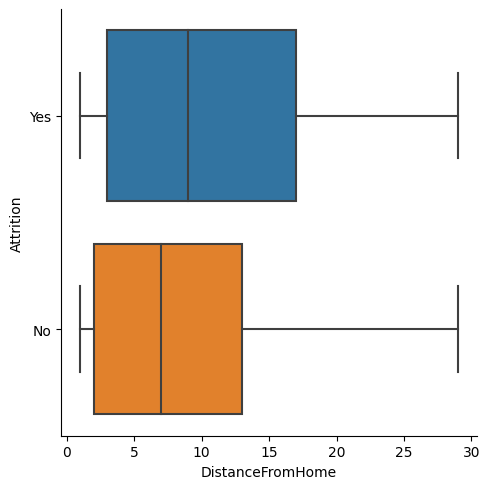

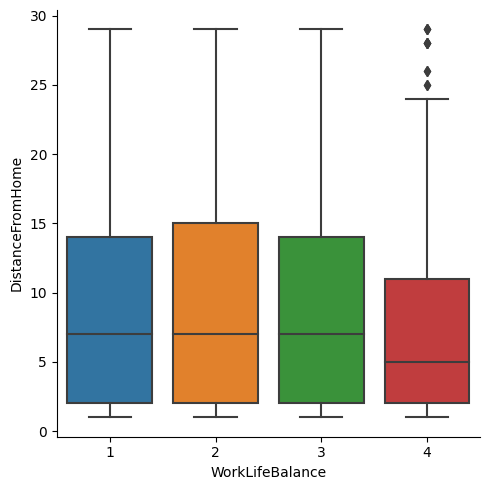

In [104]:
sns.catplot(data=dataorginal, x="DistanceFromHome", y="Attrition",errorbar=("pi", 95), kind="box")
sns.catplot(data=dataorginal, x="WorkLifeBalance", y="DistanceFromHome",errorbar=("pi", 95), kind="box")

 employees who rated their work life balance as Best are staying near  to offices. This could be a factor of why employees like their jobs and less likely to resign.

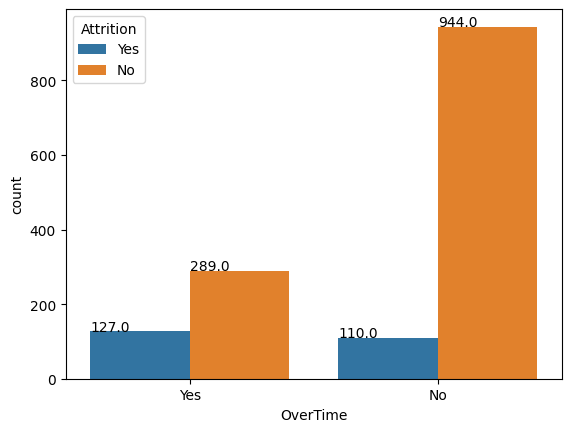

In [109]:

ax = sns.countplot(x="OverTime", hue="Attrition", data=dataorginal)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

# Insights

80% of employees who stayed at the company were not required to do overtime, on the other side, the vast majority of attrited employees were actually asked to do overtime. Could stress and job pressures had them to leave the company?

# Findings



1. Employees in the age group of 20-30 years are more likely to quit and among employees with experience ranging from 1  to 3 years is 70 percent 

2. Research and Devolpment seems the department where employees like to work as it is the department with lesser attrition

3. In gender, Females are more likely to stay and employees drawing lesser amount of salary are likely to quit

4. No of training session has an impact on employee attrition, employees who have attended lesser training session has an  impact on attrition.

5. Job roles-- Sales representative, Lab technician and Human resourses are having higher probability for attrition, and employees working in this roles are drawing lesser monthly salary and their rating on jab satisfaction was also low

6. Employees with Low job involvement tend to be younger than other groups. Could be this related to the usual obstacles when new employees join a company as it takes time to be accustomed within the company’s culture?

7. Additionally, employees who rated their work life balance as Best had shorter distance to their homes. This could be a  factor of why employees like their jobs and less likely to resign.

8. the pattern in which employees who travelled rarely had the highest attrition level, whereas the employees who were not required to travel had the least chance of attrion

9.  80% of employees who stayed at the company were not required to do overtime, on the other side, the vast majority of attrited employees were actually asked to do overtime. Could stress and job pressures had them to leave the company?








# Recommendations

Job roles like Lab techicians, Human Resources and sales representatives are having lesser Job satisfaction and less monthly salary, as 
they are the job roles that is more likely to resign management should if possible try to restructure thier salaryand subsequently try to understand
the factors that lead them to rate lesset for job satisfaction


As age group 20 - 30  are most likely freshers,were more likely to resign, management should try and incorperate more training and development session
and also should try to create an atmosphere to devolp their skills and expertiseand additionally try to increase average monthly income 

Management if possible should try to restructure their monthly salary, for instance if the company is paying a comparitvely equal or more salary is likely to have a advantage in job market,
which would reduce the cost of recruting









In [92]:
negative_attrition["YearsAtCompany"].value_counts()

5.0     175
1.0     112
3.0     108
18.0    106
10.0    102
2.0     100
4.0      91
7.0      79
9.0      74
8.0      71
6.0      67
11.0     30
0.0      28
13.0     22
15.0     19
14.0     16
12.0     14
16.0     11
17.0      8
Name: YearsAtCompany, dtype: int64

In [93]:
positive_attrition["YearsAtCompany"].value_counts()

1.0     59
2.0     27
5.0     21
3.0     20
4.0     19
10.0    18
0.0     16
18.0    11
7.0     11
6.0      9
8.0      9
9.0      8
14.0     2
13.0     2
11.0     2
16.0     1
17.0     1
15.0     1
Name: YearsAtCompany, dtype: int64